In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the YM dataset (this datased was previously created with pandas to better organize the sample's data)
samples_abs_df = pd.read_csv('YM2_dataset.csv')
samples_abs_df['abs_avg'] = samples_abs_df['abs_avg'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['abs_std'] = samples_abs_df['abs_std'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['abs_avg_2mic'] = samples_abs_df['abs_avg_2mic'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['abs_std_2mic'] = samples_abs_df['abs_std_2mic'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['freq'] = samples_abs_df['freq'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['tl_avg'] = samples_abs_df['tl_avg'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['tl_std'] = samples_abs_df['tl_std'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['real_k'] = samples_abs_df['real_k'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['imag_k'] = samples_abs_df['imag_k'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['real_z'] = samples_abs_df['real_z'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['imag_z'] = samples_abs_df['imag_z'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['real_z_2mic'] = samples_abs_df['real_z_2mic'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['imag_z_2mic'] = samples_abs_df['imag_z_2mic'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df = samples_abs_df.set_index('sample')
#samples_abs_df.head(5)
samples_abs_df.drop('YM2_multi_d1', inplace=True)
samples_abs_df.index 
samples_abs_df.rename(columns={'resflux': 'sigma_measured'}, inplace=True) 
samples_abs_df.insert(9, 'sigma_estimated', 1)
samples_abs_df.insert(10, 'porosity_estimated', 1)
samples_abs_df.insert(11, 'tortuosity_estimated', 1)

#samples_abs_df['mass']
samples_abs_df.sort_index(inplace=True)

### Characteristic Impedance ($Z_{c}$)

In [29]:
samples_abs_df.columns

Index(['abs_avg', 'abs_std', 'abs_avg_2mic', 'abs_std_2mic', 'density',
       'granul', 'thickness', 'mass', 'sigma_measured', 'sigma_estimated',
       'porosity_estimated', 'tortuosity_estimated', 'dens_value', 'freq',
       'freq_2mic', 'tl_avg', 'tl_std', 'real_k', 'imag_k', 'real_z', 'imag_z',
       'real_z_2mic', 'imag_z_2mic'],
      dtype='object')

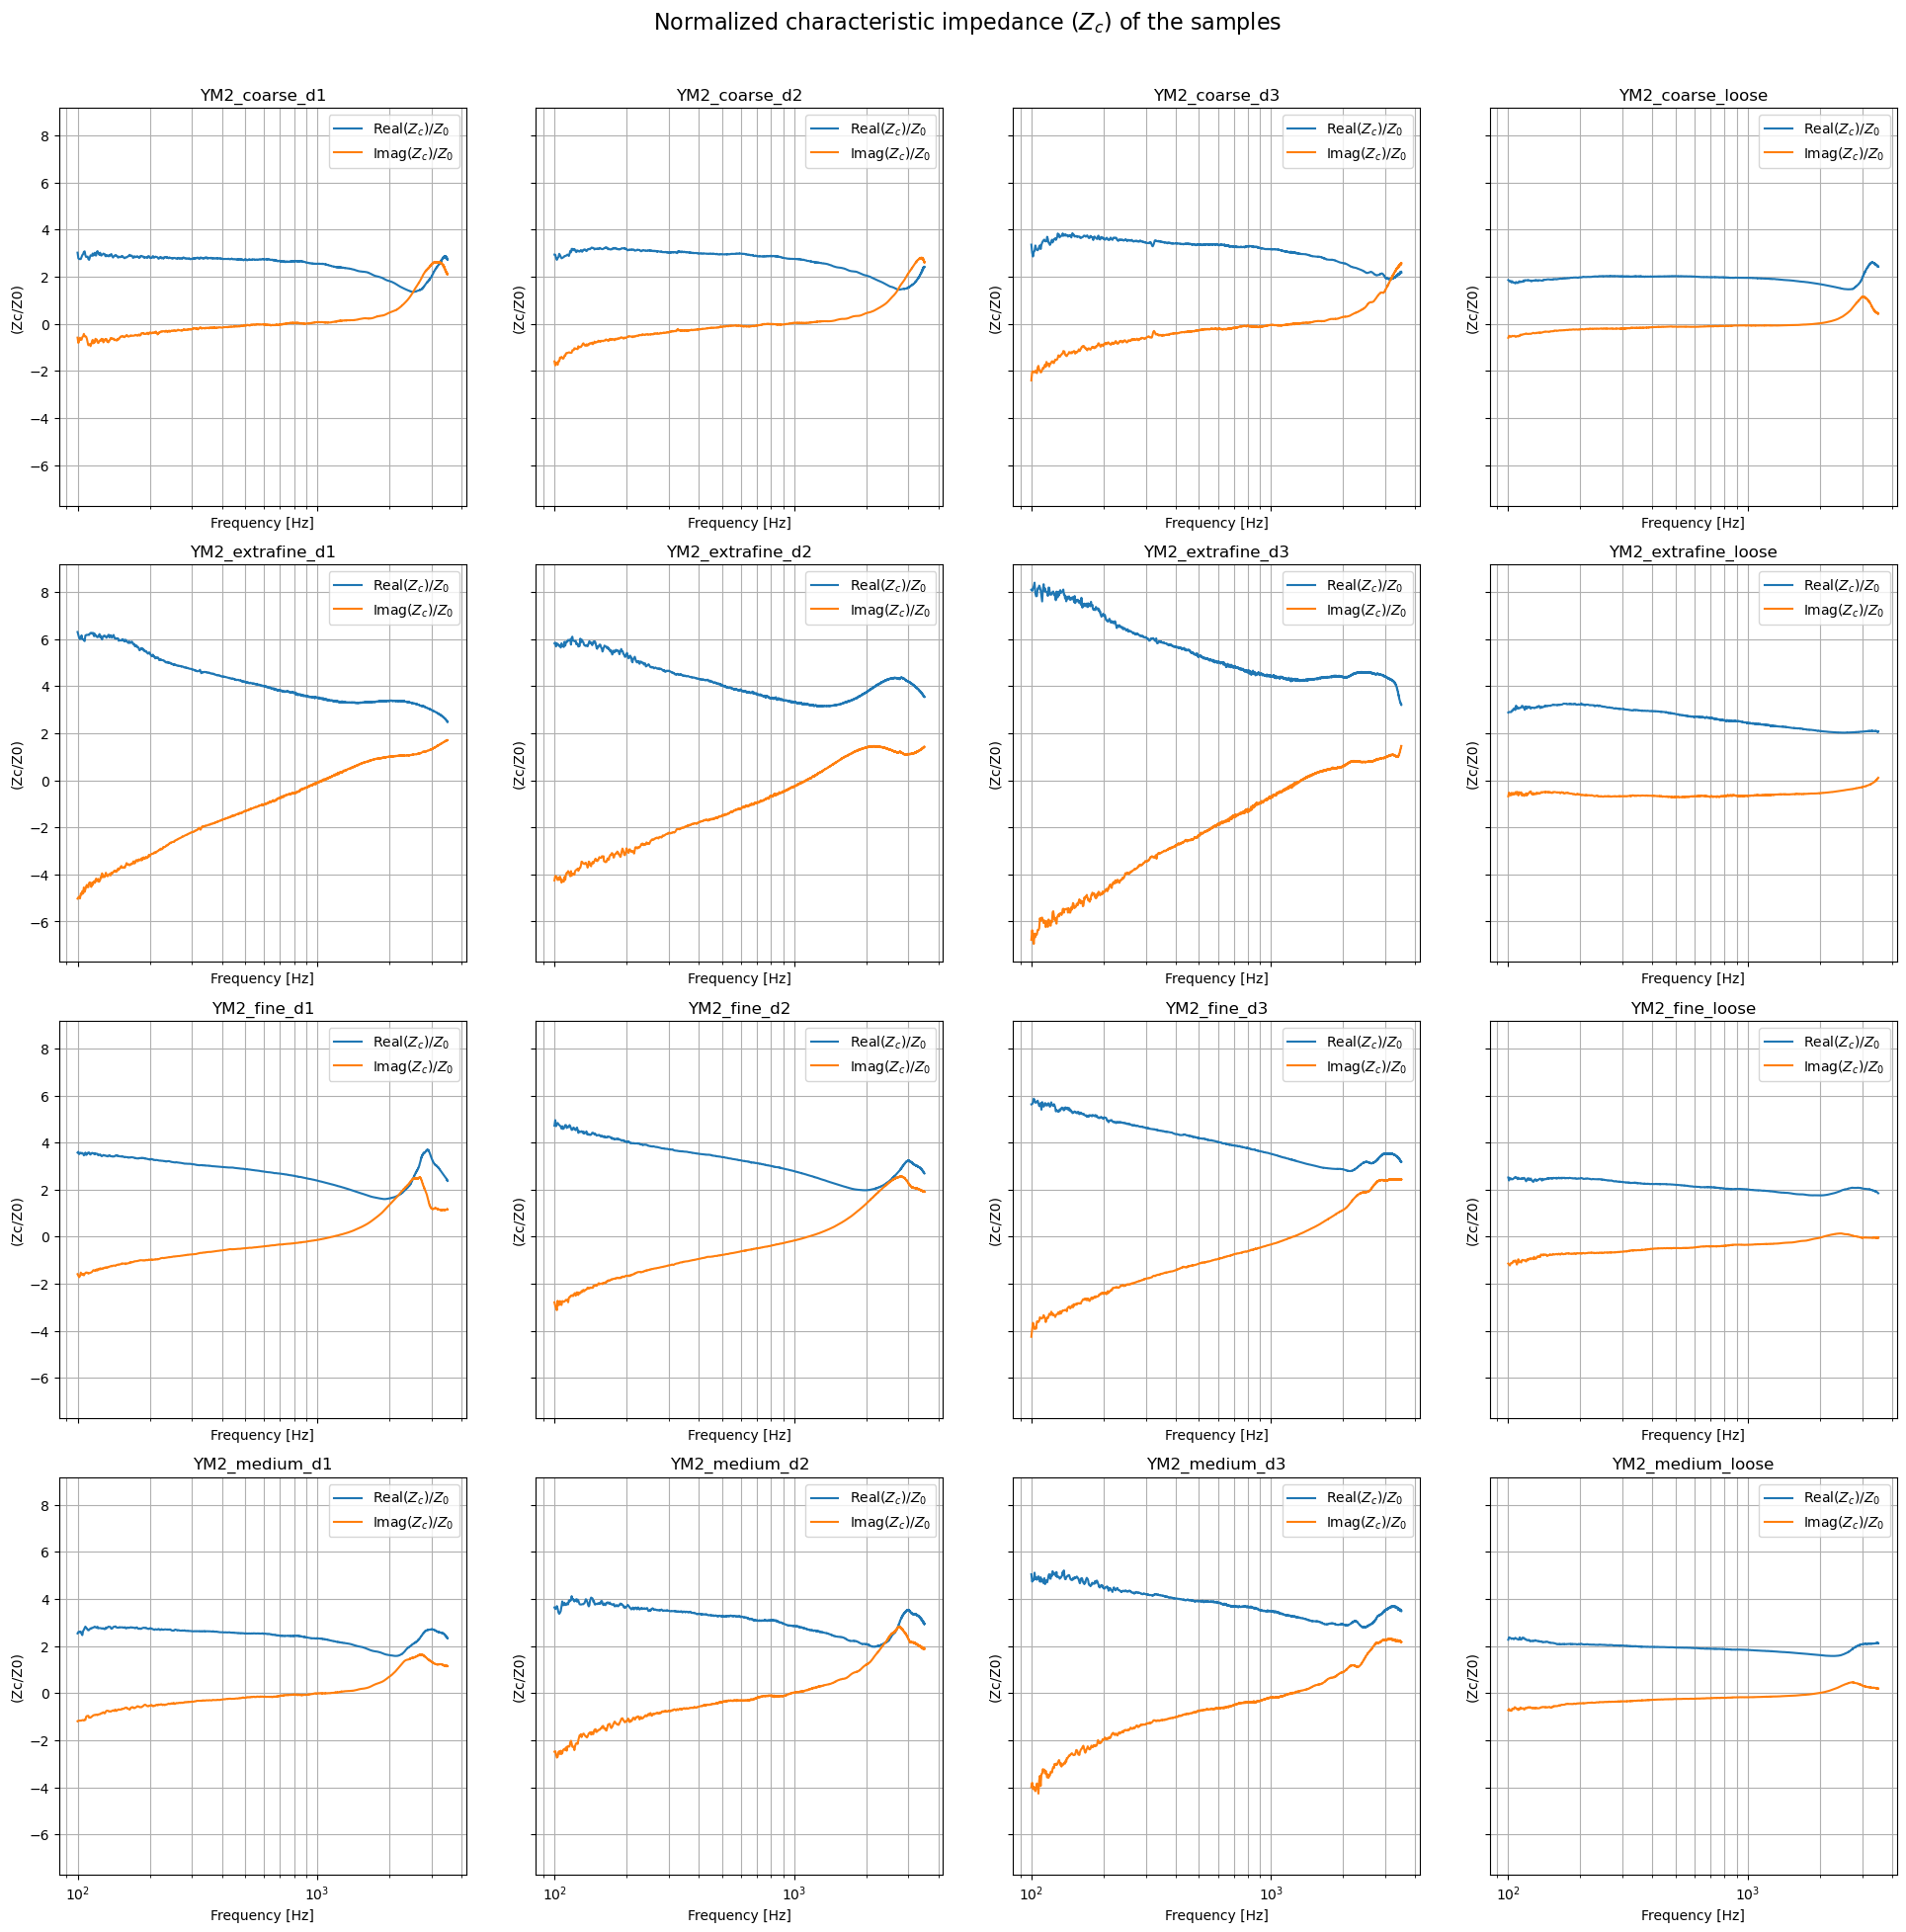

In [30]:
#ncols = (samples_abs_df['density'].unique()).size   
#nrows = (samples_abs_df['granul'].unique()).size  
ncols = 4
nrows = 4
colsize = 20
rowsize = 20


fig, ax = plt.subplots(nrows, ncols, figsize=(rowsize,colsize), squeeze=False, sharex=True, sharey=True)
ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=3.5)

r_tube= 45e-3 #Tube radius [m]
s0 = np.pi*(r_tube**2)  #Section of the tube [m^2]

p_atm = 101300     #Atmospheric pressure [Pa]
temp = 25        #Temperature [°C]
r_air = 287.05
c0 = 331 + 0.607*temp #Velocity of sound [m/s]
#rho0 = 1.293     #Density of air [kg/m^3]
rho0 = p_atm / (r_air * (273.15 + temp))
z0 = rho0*c0      #Characteristic impedance of air [Pa.s/m] [Rayl]

for i, axe in enumerate(ax):

    realz_avgdata = np.array(samples_abs_df.iloc[i]['real_z'])/(z0)     #Average real Zc
    imagz_avgdata = np.array(samples_abs_df.iloc[i]['imag_z'])/(z0)     #Average imag Zc
    realz_avgdata_2mic = np.array(samples_abs_df.iloc[i]['real_z_2mic'])#/(z0)     #Average real Zs
    imagz_avgdata_2mic = np.array(samples_abs_df.iloc[i]['imag_z_2mic'])#/(z0)     #Average imag Zs
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    axe.semilogx(freq, realz_avgdata, label=r'Real($Z_{c}$)/$Z_{0}$')      #Plot over frequency*thickness
    axe.semilogx(freq, imagz_avgdata, label=r'Imag($Z_{c}$)/$Z_{0}$')      #Plot over frequency*thickness
    #if realz_avgdata_2mic.size !=1:
    #    axe.semilogx(freq, realz_avgdata_2mic, '--', label=r'Real($Z_{s}$)/$Z_{0}$_2mic')      #Plot over frequency*thickness
    #    axe.semilogx(freq, imagz_avgdata_2mic, '--', label=r'Imag($Z_{s}$)/$Z_{0}$_2mic')      #Plot over frequency*thickness
    
    comp = realz_avgdata + 1j*imagz_avgdata
    #axe.semilogx(freq, np.abs(comp), label=r'Abs($Z_{c}$)/$Z_{0}$')      #Plot over frequency*thickness
    axe.set_title(f'{sample_name}')
    axe.set_xlabel('Frequency [Hz]')
    #axe.set_xlabel('fd [Hz*m]')
    #axe.set_ylim([0, 1.1])
    axe.set_ylabel('(Zc/Z0)')
    #axe.set_yticks(np.arange(-6, 10, 1))
    axe.grid(which='both')
    axe.legend()
    
fig.subplots_adjust(top=0.93)
fig.suptitle(r'Normalized characteristic impedance ($Z_{c}$) of the samples',fontsize=16)
plt.show()


### Wavenumber ($k$)

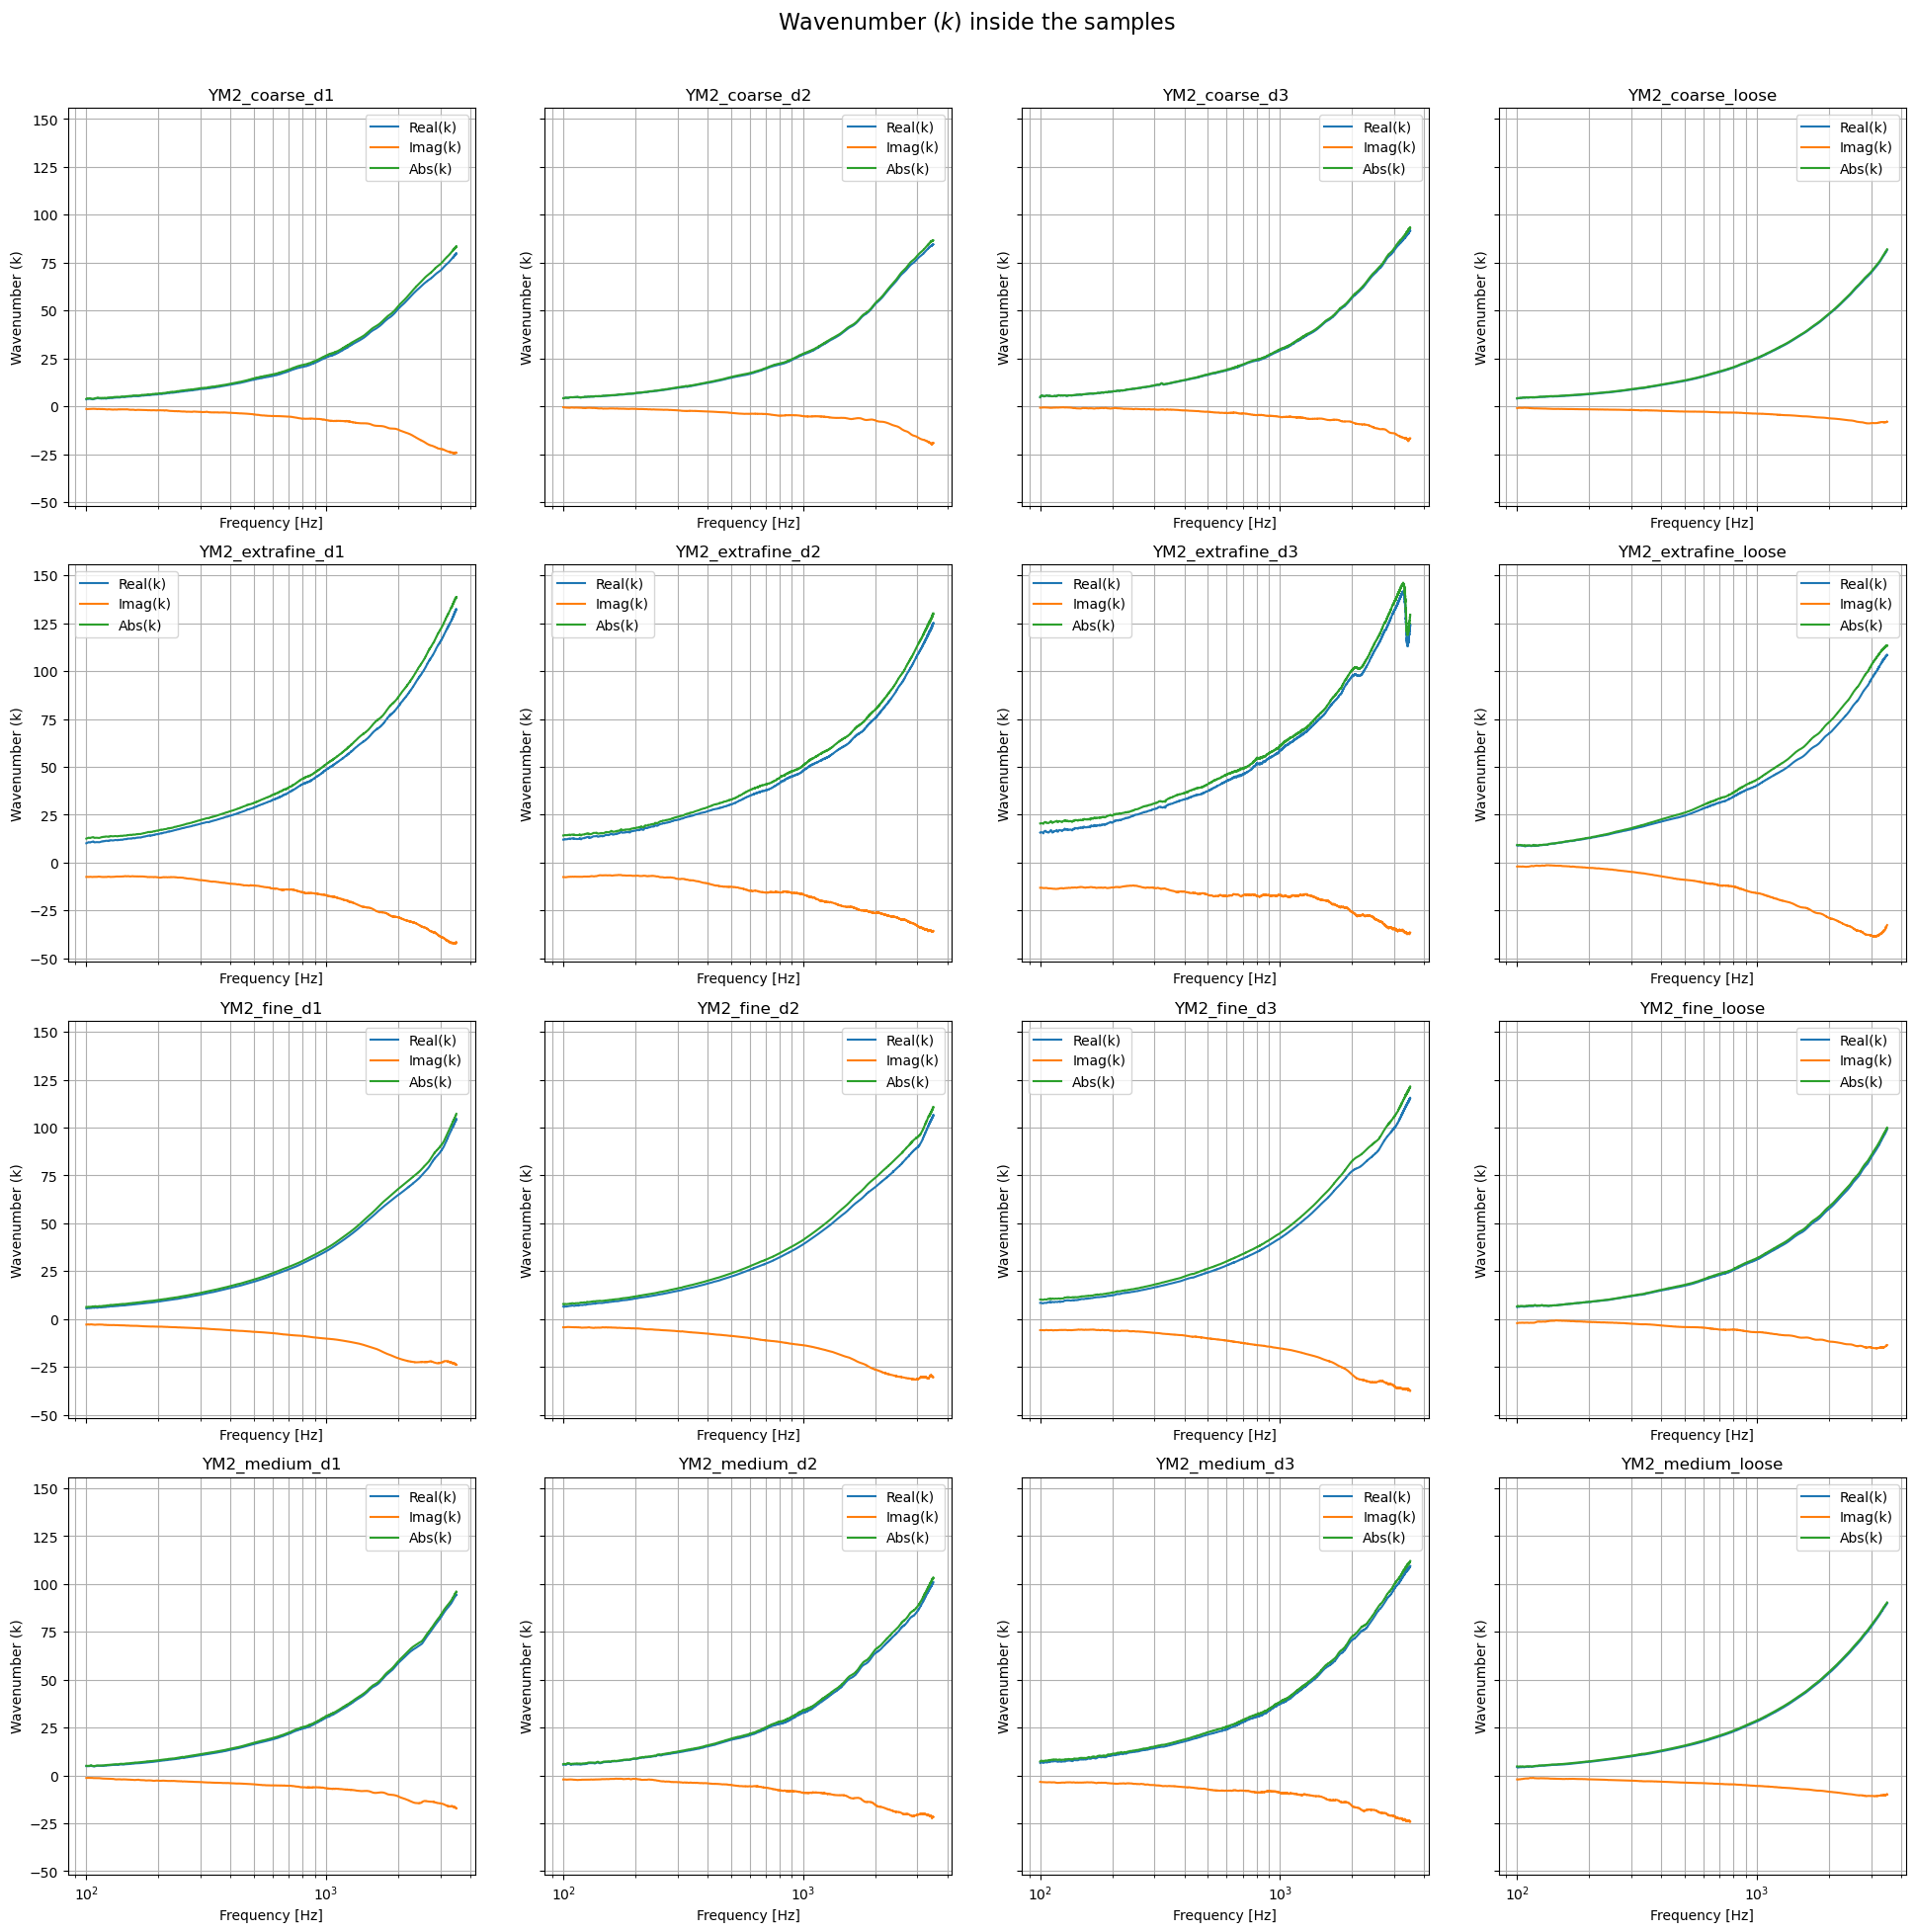

In [31]:

#Wavenumber

fig, ax = plt.subplots(nrows, ncols, figsize=(rowsize,colsize), squeeze=False, sharex=True, sharey=True)
ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=3.5)

for i, axe in enumerate(ax):

    realk_avgdata = np.array(samples_abs_df.iloc[i]['real_k'])     #Average real k
    imagk_avgdata = np.array(samples_abs_df.iloc[i]['imag_k'])     #Average imag k
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    axe.semilogx(freq, realk_avgdata, label=r'Real(k)')      #Plot over frequency*thickness
    axe.semilogx(freq, imagk_avgdata, label=r'Imag(k)')      #Plot over frequency*thickness
    comp = realk_avgdata + 1j*imagk_avgdata
    axe.semilogx(freq, np.abs(comp), label=r'Abs(k)')      #Plot over frequency*thickness
    axe.set_title(f'{sample_name}')
    axe.set_xlabel('Frequency [Hz]')
    #axe.set_xlabel('fd [Hz*m]')
    #axe.set_ylim([0, 1.1])
    axe.set_ylabel('Wavenumber (k)')
    axe.grid(which='both')
    axe.legend()
    
fig.subplots_adjust(top=0.93)
fig.suptitle(r'Wavenumber $(k)$ inside the samples',fontsize=16)
plt.show()

### Surface impedance of the samples ($Z_{s}$)
- Surface impedance for soft back-end boundary condition (Sellen)

In [32]:
imagz_avgdata

array([-0.72379087, -0.67348449, -0.7414243 , ...,  0.19609033,
        0.19416351,  0.19423683])

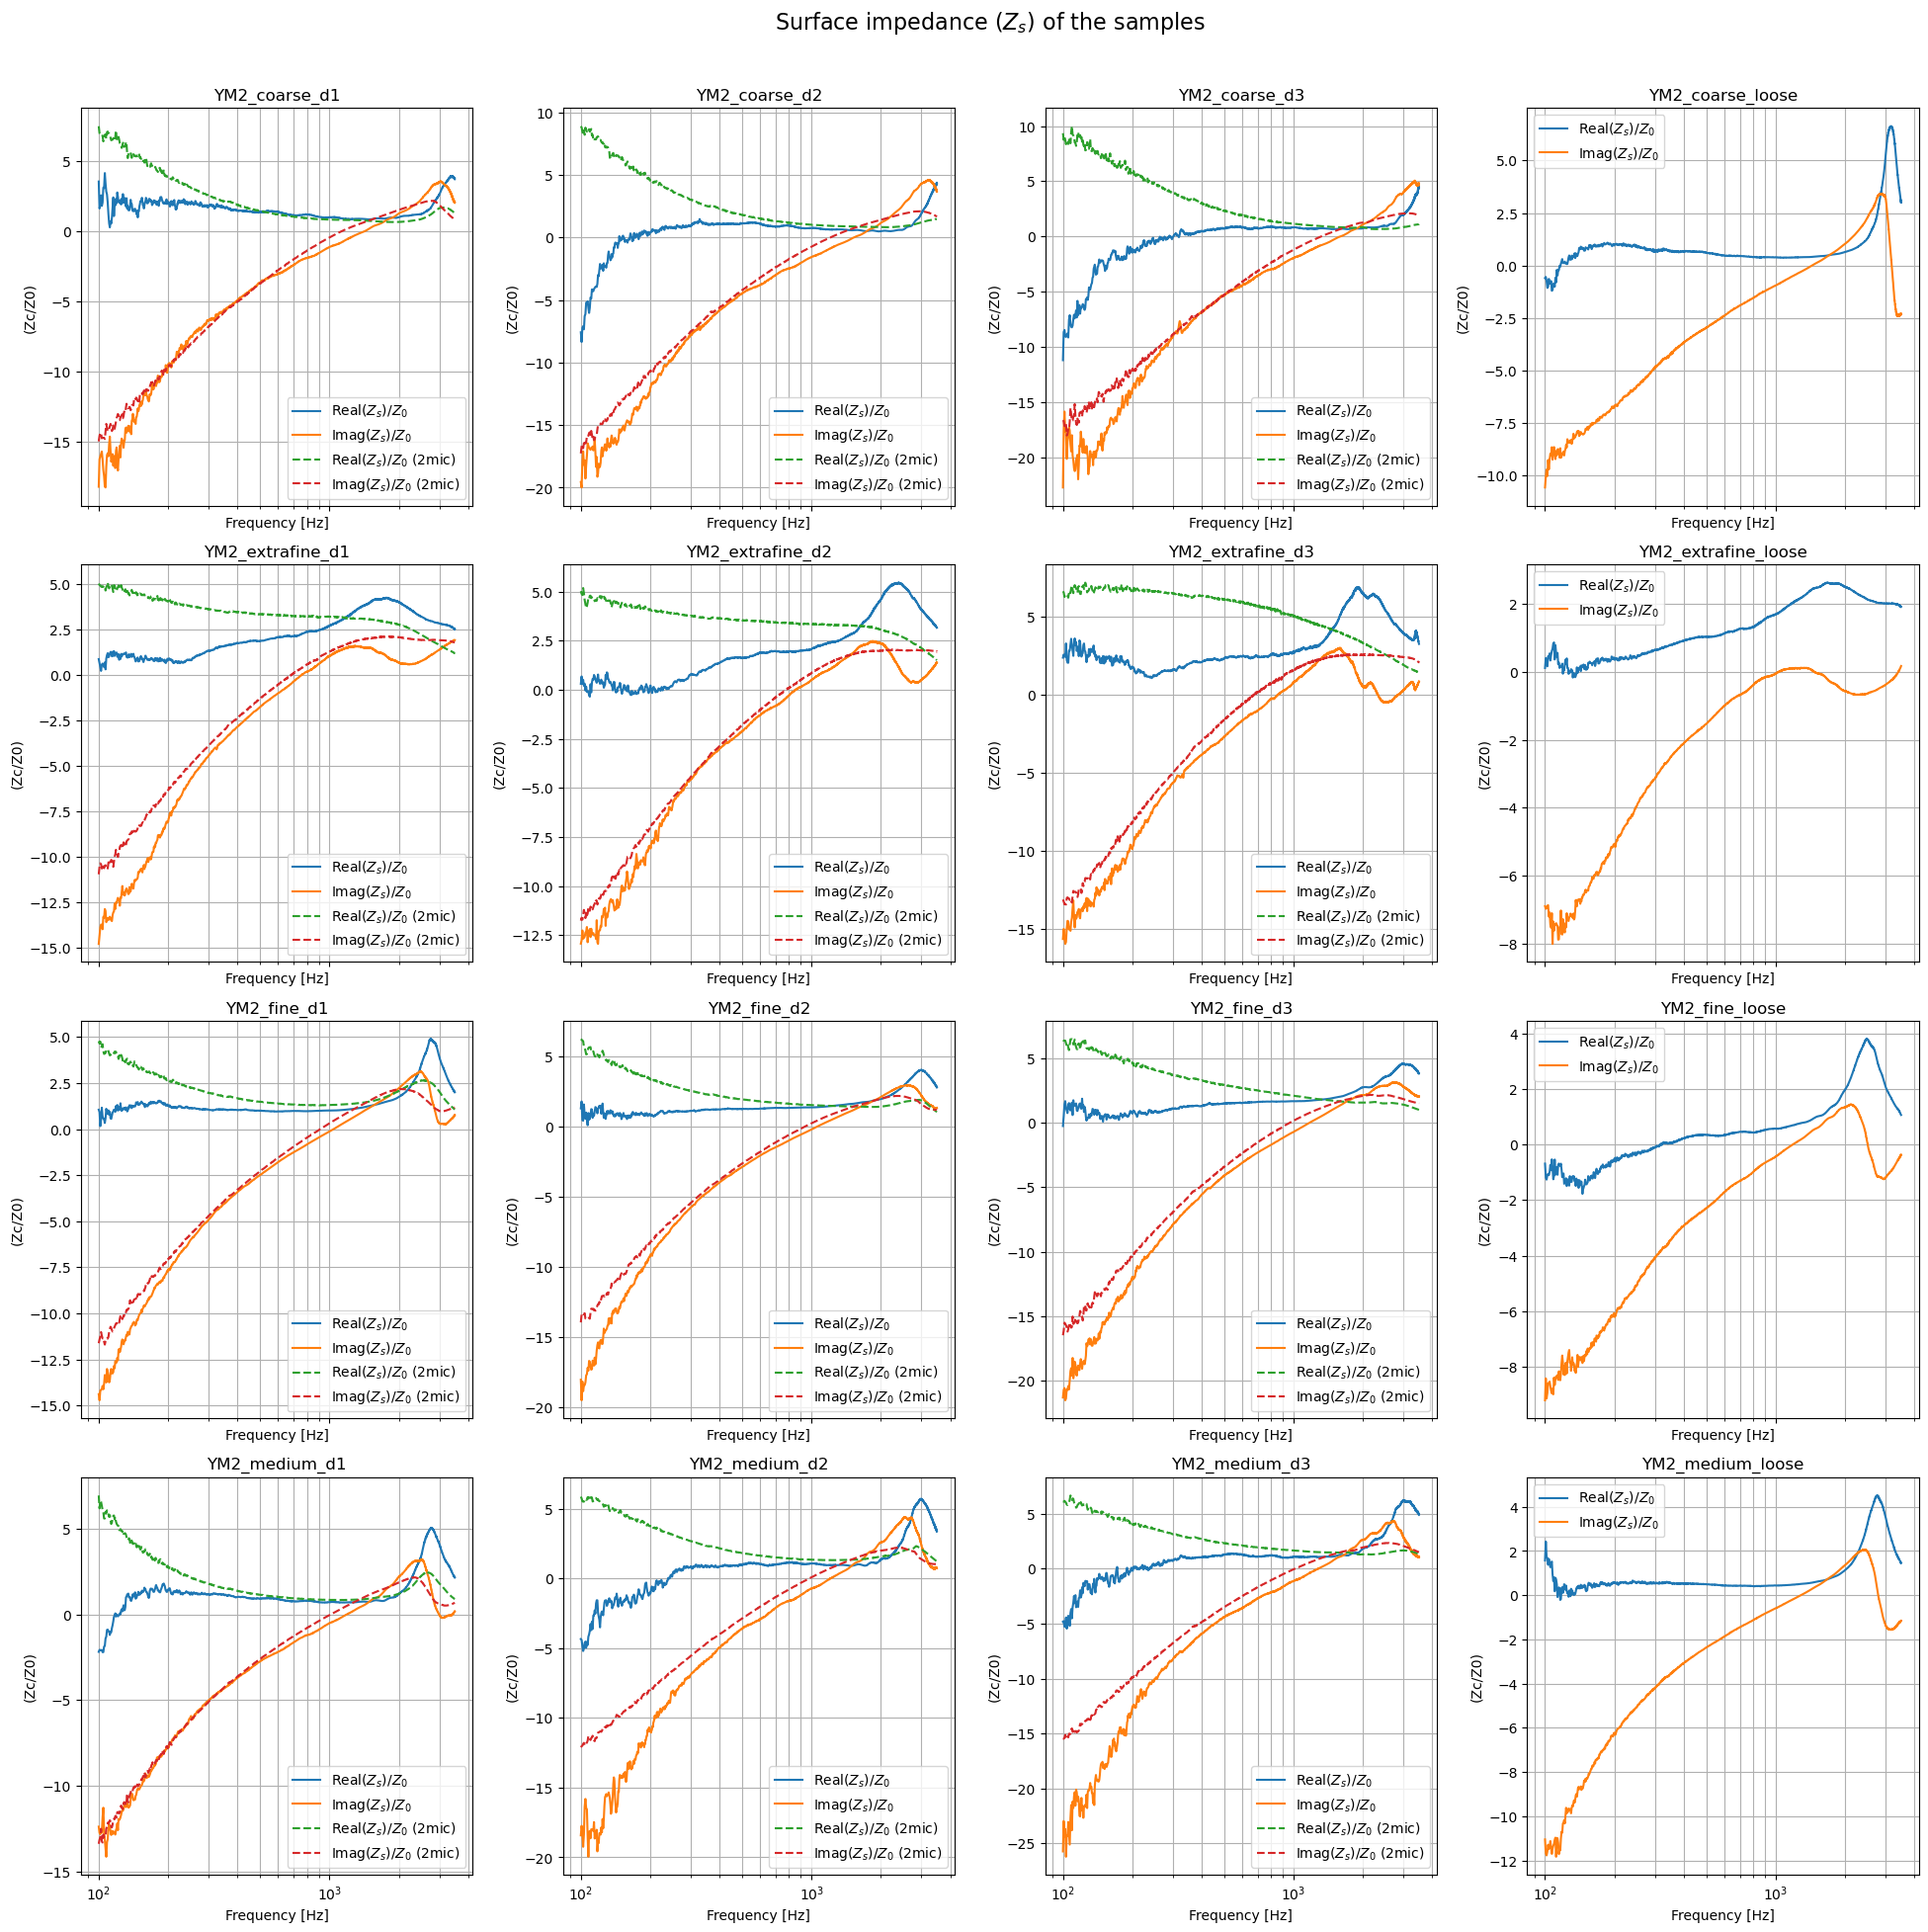

In [33]:
fig, ax = plt.subplots(nrows, ncols, figsize=(rowsize,colsize), squeeze=False, sharex=True, sharey=False)
ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=3.5)

r_tube= 45e-3 #Tube radius [m]
s0 = np.pi*(r_tube**2)  #Section of the tube [m^2]

p_atm = 99000    #Atmospheric pressure [Pa]
temp = 25        #Temperature [°C]
r_air = 287.05
c0 = 331 + 0.607*temp #Velocity of sound [m/s]
#rho0 = 1.293     #Density of air [kg/m^3]
rho0 = p_atm / (r_air * (273.15 + temp))
z0 = rho0*c0      #Characteristic impedance of air [Pa.s/m] [Rayl]

for i, axe in enumerate(ax):

    realz_avgdata = np.array(samples_abs_df.iloc[i]['real_z'])/(z0)     #Average real Zc
    imagz_avgdata = np.array(samples_abs_df.iloc[i]['imag_z'])/(z0)     #Average imag Zc
    realk_avgdata = np.array(samples_abs_df.iloc[i]['real_k'])     #Average real Zc
    imagk_avgdata = np.array(samples_abs_df.iloc[i]['imag_k'])     #Average imag Zc
    realz_avgdata_2mic = np.array(samples_abs_df.iloc[i]['real_z_2mic'])#/(z0)     #Average real Zs
    imagz_avgdata_2mic = np.array(samples_abs_df.iloc[i]['imag_z_2mic'])#/(z0)     #Average imag Zs
    
    thickness = np.array(samples_abs_df.iloc[i]['thickness'])*1e-3
    
    comp_k = (realk_avgdata + 1j*imagk_avgdata)
    comp_zc = (realz_avgdata + 1j*imagz_avgdata) #---> va con el menoss???!!!
    
    # TERMINATION BOUNDARY CONDITION:
    
    #comp_zs = 1j * (realz_avgdata + 1j*imagz_avgdata) * (np.sin((realk_avgdata + 1j*imagk_avgdata) * thickness) / np.cos((realk_avgdata + 1j*imagk_avgdata) * thickness))       # open soft end
    #comp_zs = -1j* comp_zc * np.tan(comp_k * thickness)
    
    #comp_zs = -1j * (realz_avgdata + 1j*imagz_avgdata) * (np.cos((realk_avgdata + 1j*imagk_avgdata) * thickness) / np.sin((realk_avgdata + 1j*imagk_avgdata) * thickness))     # rigid end
    comp_zs = -1j* (comp_zc) * (1/np.tan(comp_k * thickness))
    
    #comp_zs = (z0 * (1/np.tan(comp_k * thickness) + 1j * comp_zc)) / ((1/np.tan(comp_k * thickness)) + 1j * (z0 / comp_zc))   # anechoic end (Theorem of the transfer of impedance)
    # FIND THE EXPRESSION FOR ANECHOIC END BOUNDARY CONDITION!!!
    
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency
    axe.semilogx(freq, np.real(comp_zs), label=r'Real($Z_{s}$)/$Z_{0}$')      #Plot over frequency*thickness
    axe.semilogx(freq, np.imag(comp_zs), label=r'Imag($Z_{s}$)/$Z_{0}$')      #Plot over frequency*thickness
    
    if realz_avgdata_2mic.size !=1:
        axe.semilogx(freq, realz_avgdata_2mic, '--', label=r'Real($Z_{s}$)/$Z_{0}$ (2mic)')      #Plot over frequency*thickness
        axe.semilogx(freq, imagz_avgdata_2mic, '--', label=r'Imag($Z_{s}$)/$Z_{0}$ (2mic)')      #Plot over frequency*thickness
    
    # y_value = 1
    # y_value_im = 0
    # index = np.where(np.isclose(np.real(comp_zs), y_value, atol=1e-2))[0]
    # index_im = np.where(np.isclose(np.imag(comp_zs), y_value_im, atol=1e-1))[0]
    # if len(index) > 0:
    #     for i in index:
    #         axe.plot(freq[i], np.real(comp_zs[i]), 'ro', markersize=3)  # 'ro' means red color, circle marker
    # if len(index_im) > 0:
    #     for i in index_im:
    #         axe.plot(freq[i], np.imag(comp_zs[i]), 'ro', markersize=3)  # 'ro' means red color, circle marker        
    
    #axe.semilogx(freq, np.abs(comp_zs), label=r'Abs($Z_{s}$)/$Z_{0}$')      #Plot over frequency*thickness
    axe.set_title(f'{sample_name}')
    axe.set_xlabel('Frequency [Hz]')
    
    #axe.set_ylim([-10, 10])
    axe.set_ylabel('(Zc/Z0)')
    #axe.set_yticks(np.arange(-6, 10, 1))
    axe.grid(which='both')
    axe.legend()
    
fig.subplots_adjust(top=0.93)
fig.suptitle(r'Surface impedance ($Z_{s}$) of the samples',fontsize=16)
plt.show()

### Velocity of sound inside the material ($c$)

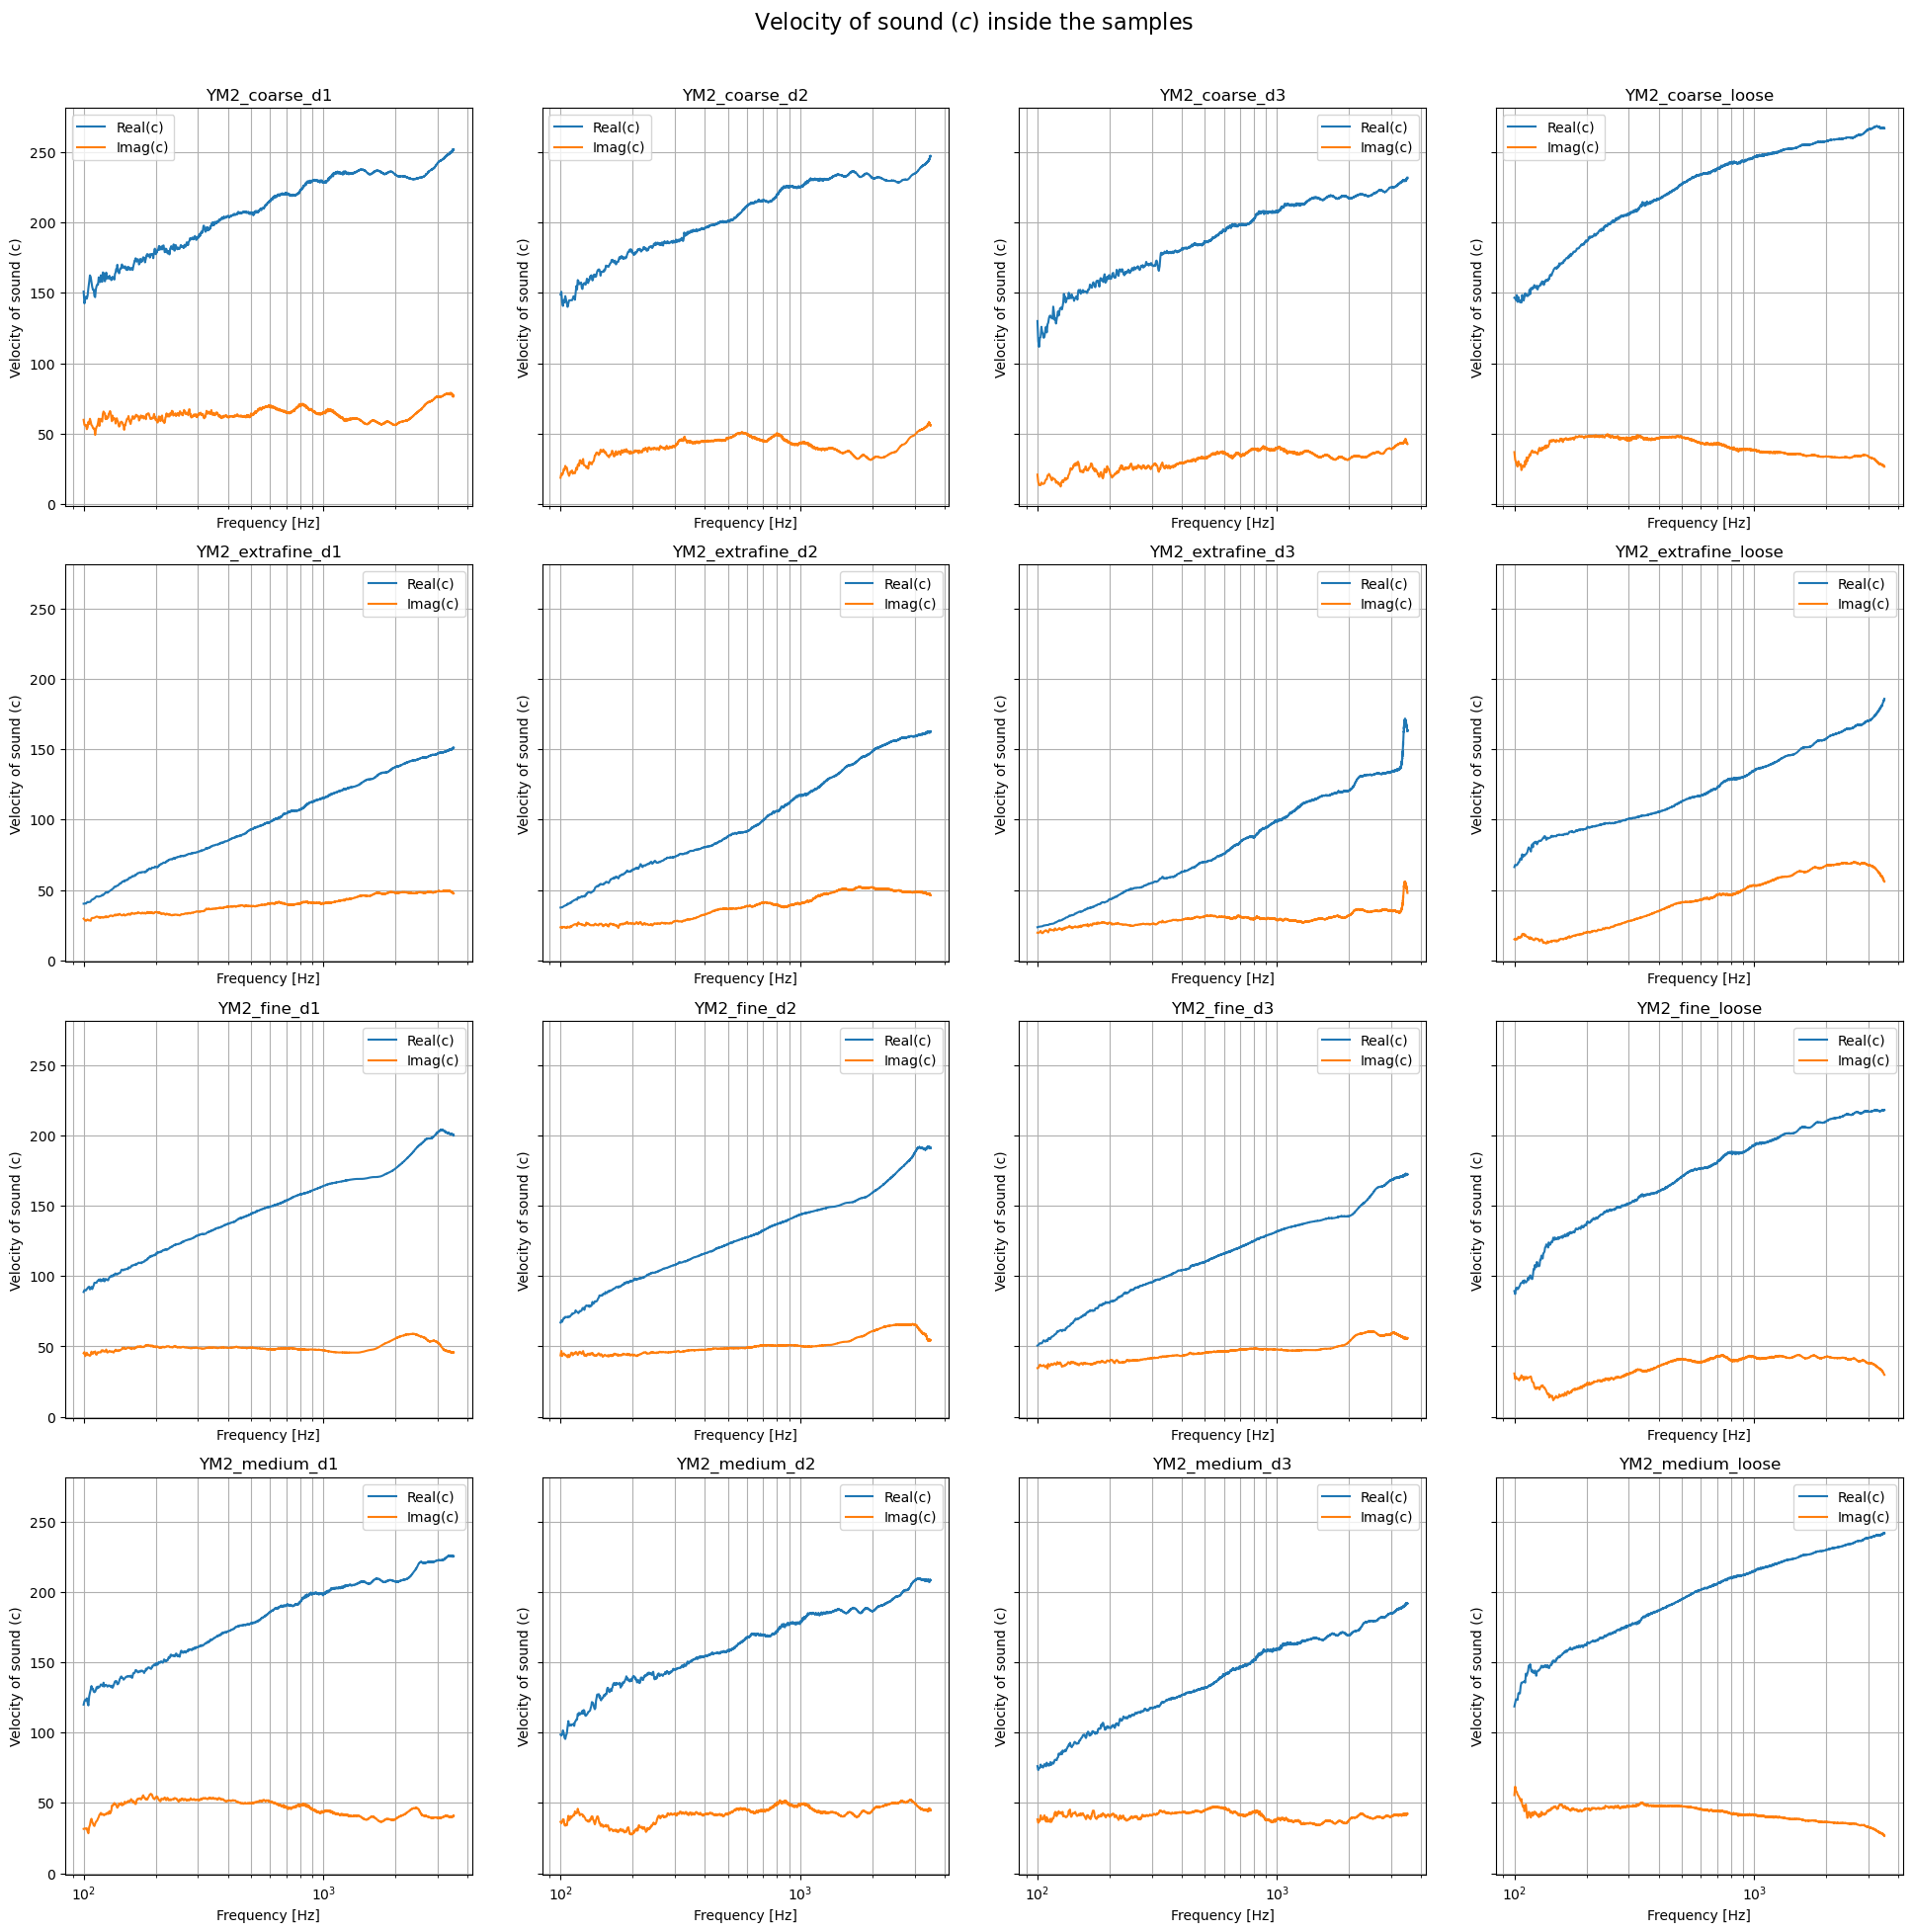

In [34]:
n_samples = samples_abs_df.index.size
samples_abs_df.loc[:,'real_c'] = 1
samples_abs_df.loc[:,'imag_c'] = 1
samples_abs_df['real_c'] = samples_abs_df['real_c'].astype('object') 
samples_abs_df['imag_c'] = samples_abs_df['imag_c'].astype('object') 

for i in samples_abs_df.index:
    samples_abs_df.at[i, 'real_c'] = list(np.real(2*np.pi*freq/(np.array(samples_abs_df.loc[i]['real_k']) + 1j*np.array(samples_abs_df.loc[i]['imag_k']))))
    samples_abs_df.at[i, 'imag_c'] = list(np.imag(2*np.pi*freq/(np.array(samples_abs_df.loc[i]['real_k']) + 1j*np.array(samples_abs_df.loc[i]['imag_k']))))


#Characteristic Impedance

fig, ax = plt.subplots(nrows, ncols, figsize=(rowsize,colsize), squeeze=False, sharex=True, sharey=True)
ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=3.5)

for i, axe in enumerate(ax):
    #if i == len(ax)-1:  #If the last plot is reached, break the loop
    #    break
    realc_avgdata = np.array(samples_abs_df.iloc[i]['real_c'])     #Average real Zc
    imagc_avgdata = np.array(samples_abs_df.iloc[i]['imag_c'])     #Average imag Zc
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    axe.semilogx(freq, realc_avgdata, label=r'Real(c)')      #Plot over frequency*thickness
    axe.semilogx(freq, imagc_avgdata, label=r'Imag(c)')      #Plot over frequency*thickness
    comp = realc_avgdata + 1j*imagc_avgdata
    #axe.semilogx(freq, np.abs(comp), label=r'Abs(c)')      #Plot over frequency*thickness
    axe.set_title(f'{sample_name}')
    axe.set_xlabel('Frequency [Hz]')
    #axe.set_xlabel('fd [Hz*m]')
    #axe.set_ylim([0, 1.1])
    axe.set_ylabel('Velocity of sound (c)')
    axe.grid(which='both')
    axe.legend()
    
fig.subplots_adjust(top=0.93)
fig.suptitle(r'Velocity of sound $(c)$ inside the samples',fontsize=16)
plt.show()

### Dynamic mass density ($\rho_{c}$):

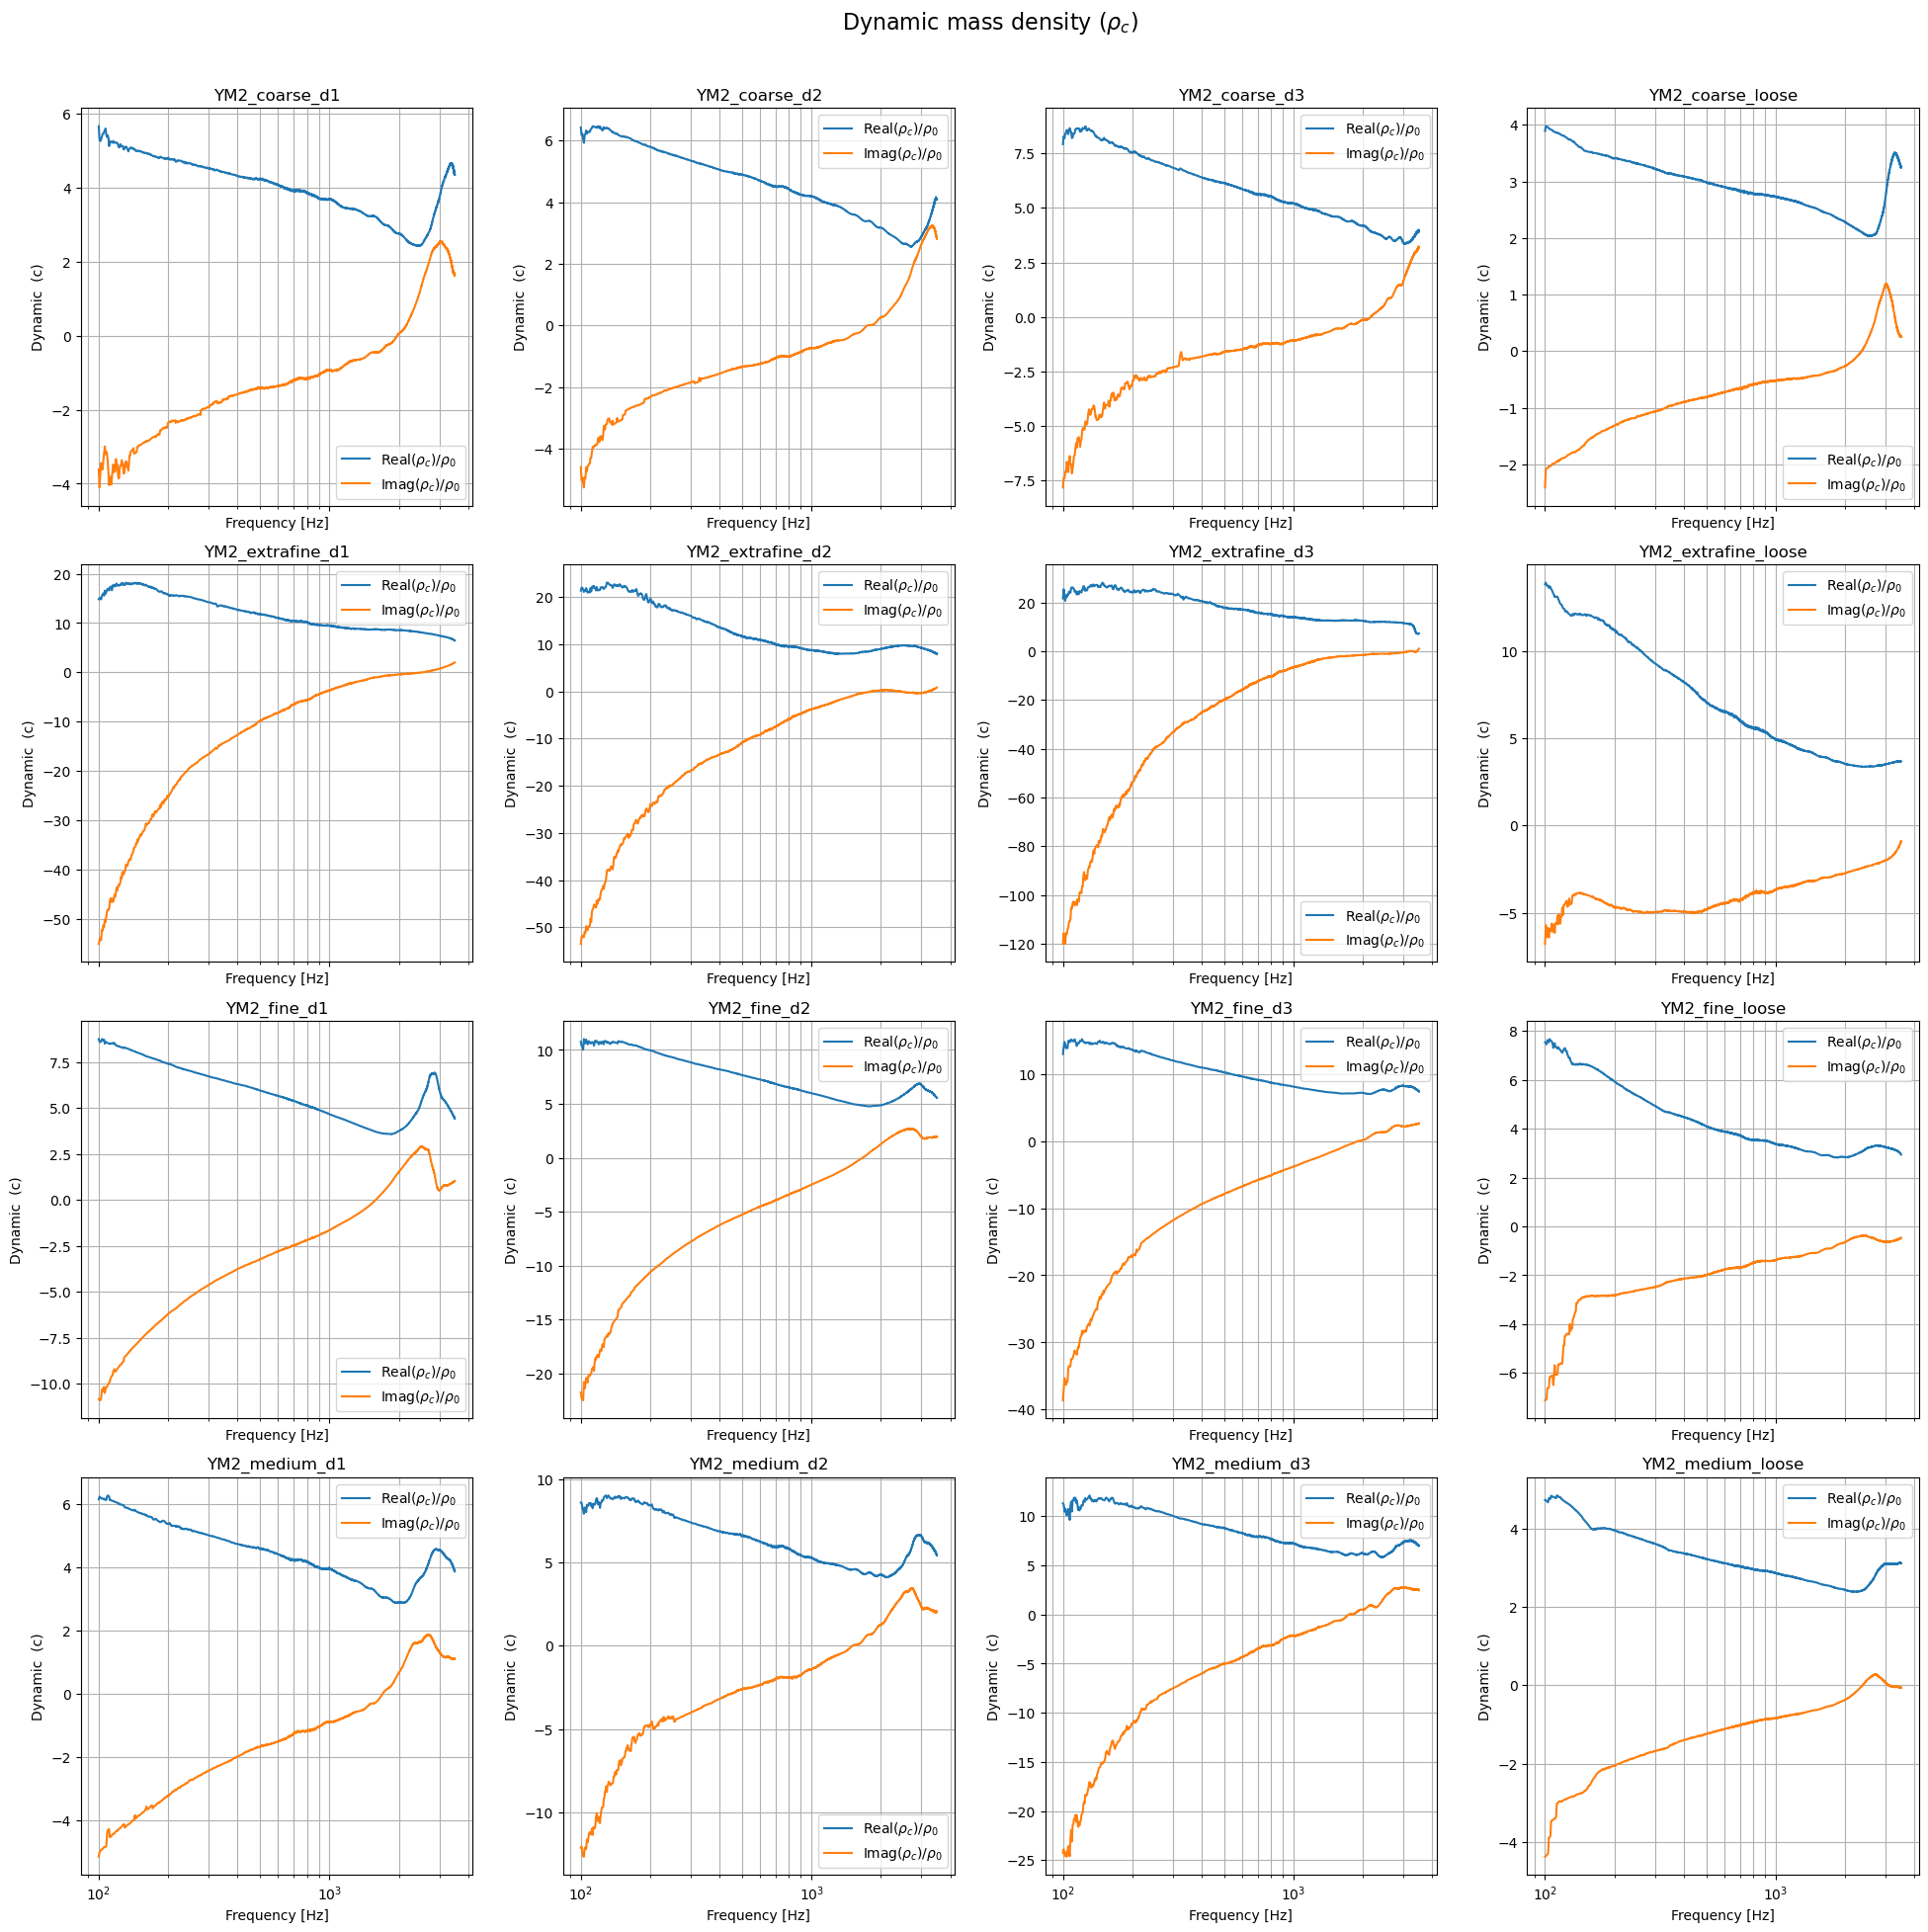

In [35]:
n_samples = samples_abs_df.index.size
samples_abs_df.loc[:,'real_rho'] = 1
samples_abs_df.loc[:,'imag_rho'] = 1
samples_abs_df['real_rho'] = samples_abs_df['real_rho'].astype('object') 
samples_abs_df['imag_rho'] = samples_abs_df['imag_rho'].astype('object') 

# Calculus of dynamic mass density
for i in samples_abs_df.index:
    zc = np.array(samples_abs_df.loc[i]['real_z']) + 1j*np.array(samples_abs_df.loc[i]['imag_z'])
    k = np.array(samples_abs_df.loc[i]['real_k']) + 1j*np.array(samples_abs_df.loc[i]['imag_k'])
    samples_abs_df.at[i, 'real_rho'] = list(np.real((zc*k)/(2*np.pi*freq)))
    samples_abs_df.at[i, 'imag_rho'] = list(np.imag((zc*k)/(2*np.pi*freq)))
    

#Dynamic mass density (rho_c)

fig, ax = plt.subplots(nrows, ncols, figsize=(rowsize,colsize), squeeze=False, sharex=True, sharey=False)
ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=3.5)

for i, axe in enumerate(ax):

    realrho_avgdata = np.array(samples_abs_df.iloc[i]['real_rho'])/rho0     #Average real Zc
    imagrho_avgdata = np.array(samples_abs_df.iloc[i]['imag_rho'])/rho0     #Average imag Zc
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    axe.semilogx(freq, realrho_avgdata, label=r'Real($\rho_{c}$)/$\rho_{0}$')      #Plot over frequency*thickness
    axe.semilogx(freq, imagrho_avgdata, label=r'Imag($\rho_{c}$)/$\rho_{0}$')      #Plot over frequency*thickness
    comp = realrho_avgdata + 1j*imagrho_avgdata
    #axe.semilogx(freq, np.abs(comp), label=r'Abs($\rho_{c}$)/$\rho_{0}$')      #Plot over frequency*thickness
    axe.set_title(f'{sample_name}')
    axe.set_xlabel('Frequency [Hz]')
    #axe.set_xlabel('fd [Hz*m]')
    #axe.set_ylim([0, 1.1])
    axe.set_ylabel('Dynamic  (c)')
    axe.grid(which='both')
    axe.legend()
    
fig.subplots_adjust(top=0.93)
fig.suptitle(r'Dynamic mass density ($\rho_{c}$)',fontsize=16)
plt.show()




In [36]:
zc[0]

(929.038391844483-296.5690901413023j)

### Bulk modulus ($\Kappa$):

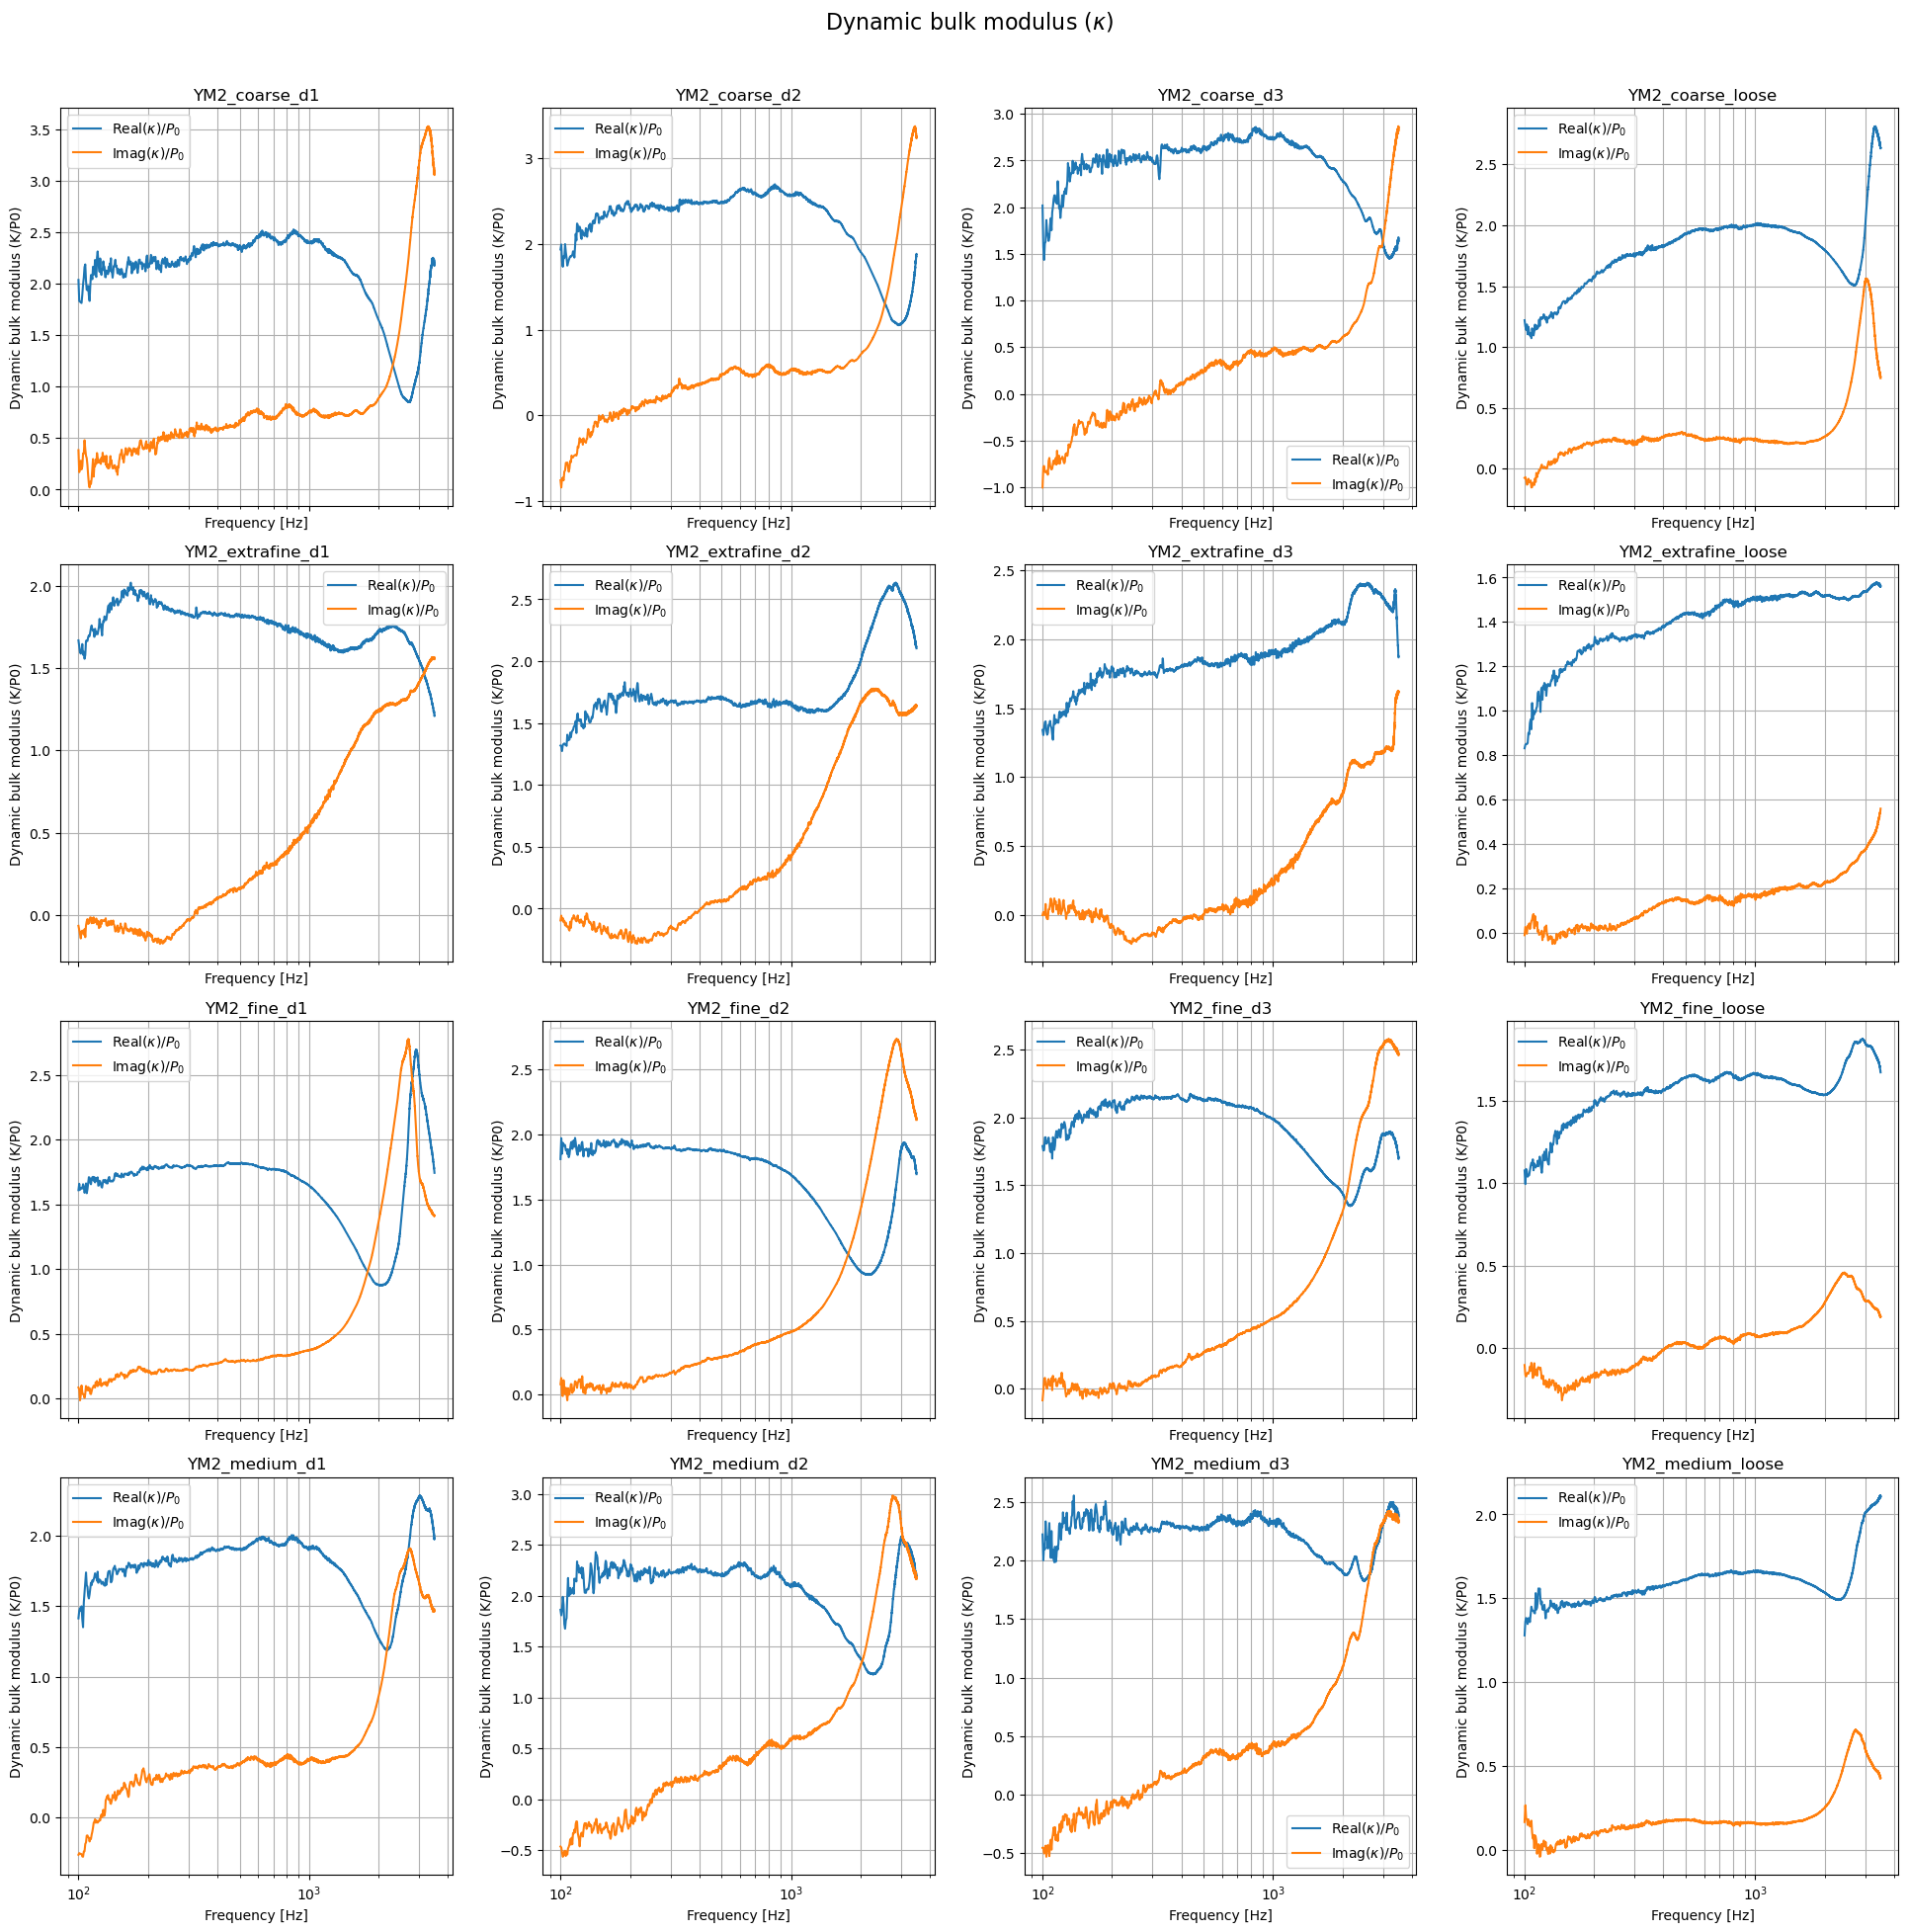

In [37]:
n_samples = samples_abs_df.index.size
samples_abs_df.loc[:,'real_K'] = 1
samples_abs_df.loc[:,'imag_K'] = 1
samples_abs_df['real_K'] = samples_abs_df['real_K'].astype('object') 
samples_abs_df['imag_K'] = samples_abs_df['imag_K'].astype('object') 


for i in samples_abs_df.index:
    zc = np.array(samples_abs_df.loc[i]['real_z']) + 1j*np.array(samples_abs_df.loc[i]['imag_z'])
    k = np.array(samples_abs_df.loc[i]['real_k']) + 1j*np.array(samples_abs_df.loc[i]['imag_k'])
    samples_abs_df.at[i, 'real_K'] = list(np.real((zc * 2 * np.pi * freq) / k))
    samples_abs_df.at[i, 'imag_K'] = list(np.imag((zc * 2 * np.pi * freq) / k))


fig, ax = plt.subplots(nrows, ncols, figsize=(rowsize,colsize), squeeze=False, sharex=True)
ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=3.5)

for i, axe in enumerate(ax):

    realK_avgdata = np.array(samples_abs_df.iloc[i]['real_K'])/p_atm     #Average real Kc
    imagK_avgdata = np.array(samples_abs_df.iloc[i]['imag_K'])/p_atm     #Average imag Kc
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    axe.semilogx(freq, realK_avgdata, label=r'Real($\kappa$)/$P_{0}$')      #Plot over frequency*thickness
    axe.semilogx(freq, imagK_avgdata, label=r'Imag($\kappa$)/$P_{0}$')      #Plot over frequency*thickness
    comp = realK_avgdata + 1j*imagK_avgdata
    #axe.semilogx(freq, np.abs(comp), label=r'Abs($\kappa$)/$P_{0}$')      #Plot over frequency*thickness
    axe.set_title(f'{sample_name}')
    axe.set_xlabel('Frequency [Hz]')
    #axe.set_xlabel('fd [Hz*m]')
    #axe.set_ylim([0, 1.1])
    axe.set_ylabel('Dynamic bulk modulus (K/P0)')
    axe.grid(which='both')
    axe.legend()
    
fig.subplots_adjust(top=0.93)
fig.suptitle(r'Dynamic bulk modulus ($\kappa$)',fontsize=16)
plt.show()

### Porosity from the low or high-frequency asymptotes of Real(K)

<>:41: SyntaxWarning: invalid escape sequence '\p'
<>:41: SyntaxWarning: invalid escape sequence '\p'
<>:41: SyntaxWarning: invalid escape sequence '\p'
<>:41: SyntaxWarning: invalid escape sequence '\p'
C:\Users\joaqu\AppData\Local\Temp\ipykernel_43584\561785185.py:41: SyntaxWarning: invalid escape sequence '\p'
  ax.text(freq_start*1.2, 4, f'$\phi =${round(1/round(popt[0],2),2)} $\pm$ {round(std_dev[0],3)}', ha="left", va="baseline", c='r', fontsize=16)
C:\Users\joaqu\AppData\Local\Temp\ipykernel_43584\561785185.py:41: SyntaxWarning: invalid escape sequence '\p'
  ax.text(freq_start*1.2, 4, f'$\phi =${round(1/round(popt[0],2),2)} $\pm$ {round(std_dev[0],3)}', ha="left", va="baseline", c='r', fontsize=16)


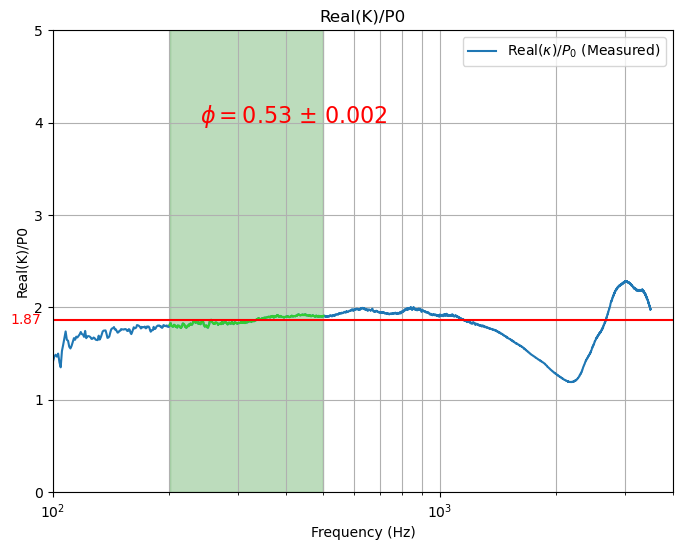

In [38]:
from scipy.optimize import curve_fit

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

sample_selected = 'YM2_medium_d1'

realK_avgdata = np.array(samples_abs_df.loc[sample_selected]['real_K'])/p_atm     #Average real Kc
imagK_avgdata = np.array(samples_abs_df.loc[sample_selected]['imag_K'])/p_atm     #Average imag Kc

# Frequency interval to analyse
freq_start = 200 
freq_end = 500

index_start = np.where(freq==freq_start)[0][0]
index_end = np.where(freq==freq_end)[0][0]

interval_x = freq[(freq >= freq_start) & (freq <= freq_end)]
interval_y = realK_avgdata[index_start:index_end+1]

# Function to fit: a horizontal line (y = a) with a constant slope
def horizontal_line(x, a):
    return a

# Initial guess for the parameter 'a'
p0 = np.mean(interval_y)

# Fit the line to the interval data
popt, pcov = curve_fit(horizontal_line, interval_x, interval_y, p0=p0)
std_dev = np.sqrt(np.diag(pcov))

ax.semilogx(freq, realK_avgdata, label=r'Real($\kappa$)/$P_{0}$ (Measured)')
ax.semilogx(interval_x, interval_y, c='limegreen')
#ax.semilogx(freq, line_fit, '--',c='r')
ax.axhline(popt, color='red', alpha=1)
cond1 = freq>freq_start
cond2=  freq<freq_end
comb_cond = cond1 & cond2 
ax.fill_between(freq, 0, 5, where= comb_cond, color='forestgreen', alpha=0.3)
ax.text(85, round(popt[0],2), f'${round(popt[0],2)}$', ha="center", va="center", c='r')
ax.text(freq_start*1.2, 4, f'$\phi =${round(1/round(popt[0],2),2)} $\pm$ {round(std_dev[0],3)}', ha="left", va="baseline", c='r', fontsize=16)
#ax.semilogx(freq, imagK_avgdata)
ax.grid(which='both')
ax.set_xlim(100, 4000)
ax.set_ylim(0, 5)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Real(K)/P0')
ax.set_title('Real(K)/P0')
ax.legend()
plt.show()


<>:48: SyntaxWarning: invalid escape sequence '\p'
<>:48: SyntaxWarning: invalid escape sequence '\p'
<>:48: SyntaxWarning: invalid escape sequence '\p'
<>:48: SyntaxWarning: invalid escape sequence '\p'
C:\Users\joaqu\AppData\Local\Temp\ipykernel_43584\1340832566.py:48: SyntaxWarning: invalid escape sequence '\p'
  axe.text(freq_start*1.2, 4, f'$\phi =${round(1/round(popt[0],2),2)} $\pm$ {round(std_dev[0],3)}', ha="left", va="baseline", c='r', fontsize=16)
C:\Users\joaqu\AppData\Local\Temp\ipykernel_43584\1340832566.py:48: SyntaxWarning: invalid escape sequence '\p'
  axe.text(freq_start*1.2, 4, f'$\phi =${round(1/round(popt[0],2),2)} $\pm$ {round(std_dev[0],3)}', ha="left", va="baseline", c='r', fontsize=16)
C:\Users\joaqu\AppData\Local\Temp\ipykernel_43584\1340832566.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.43' has dtype incompatible with int64, please explicitly cast to a compatible dty

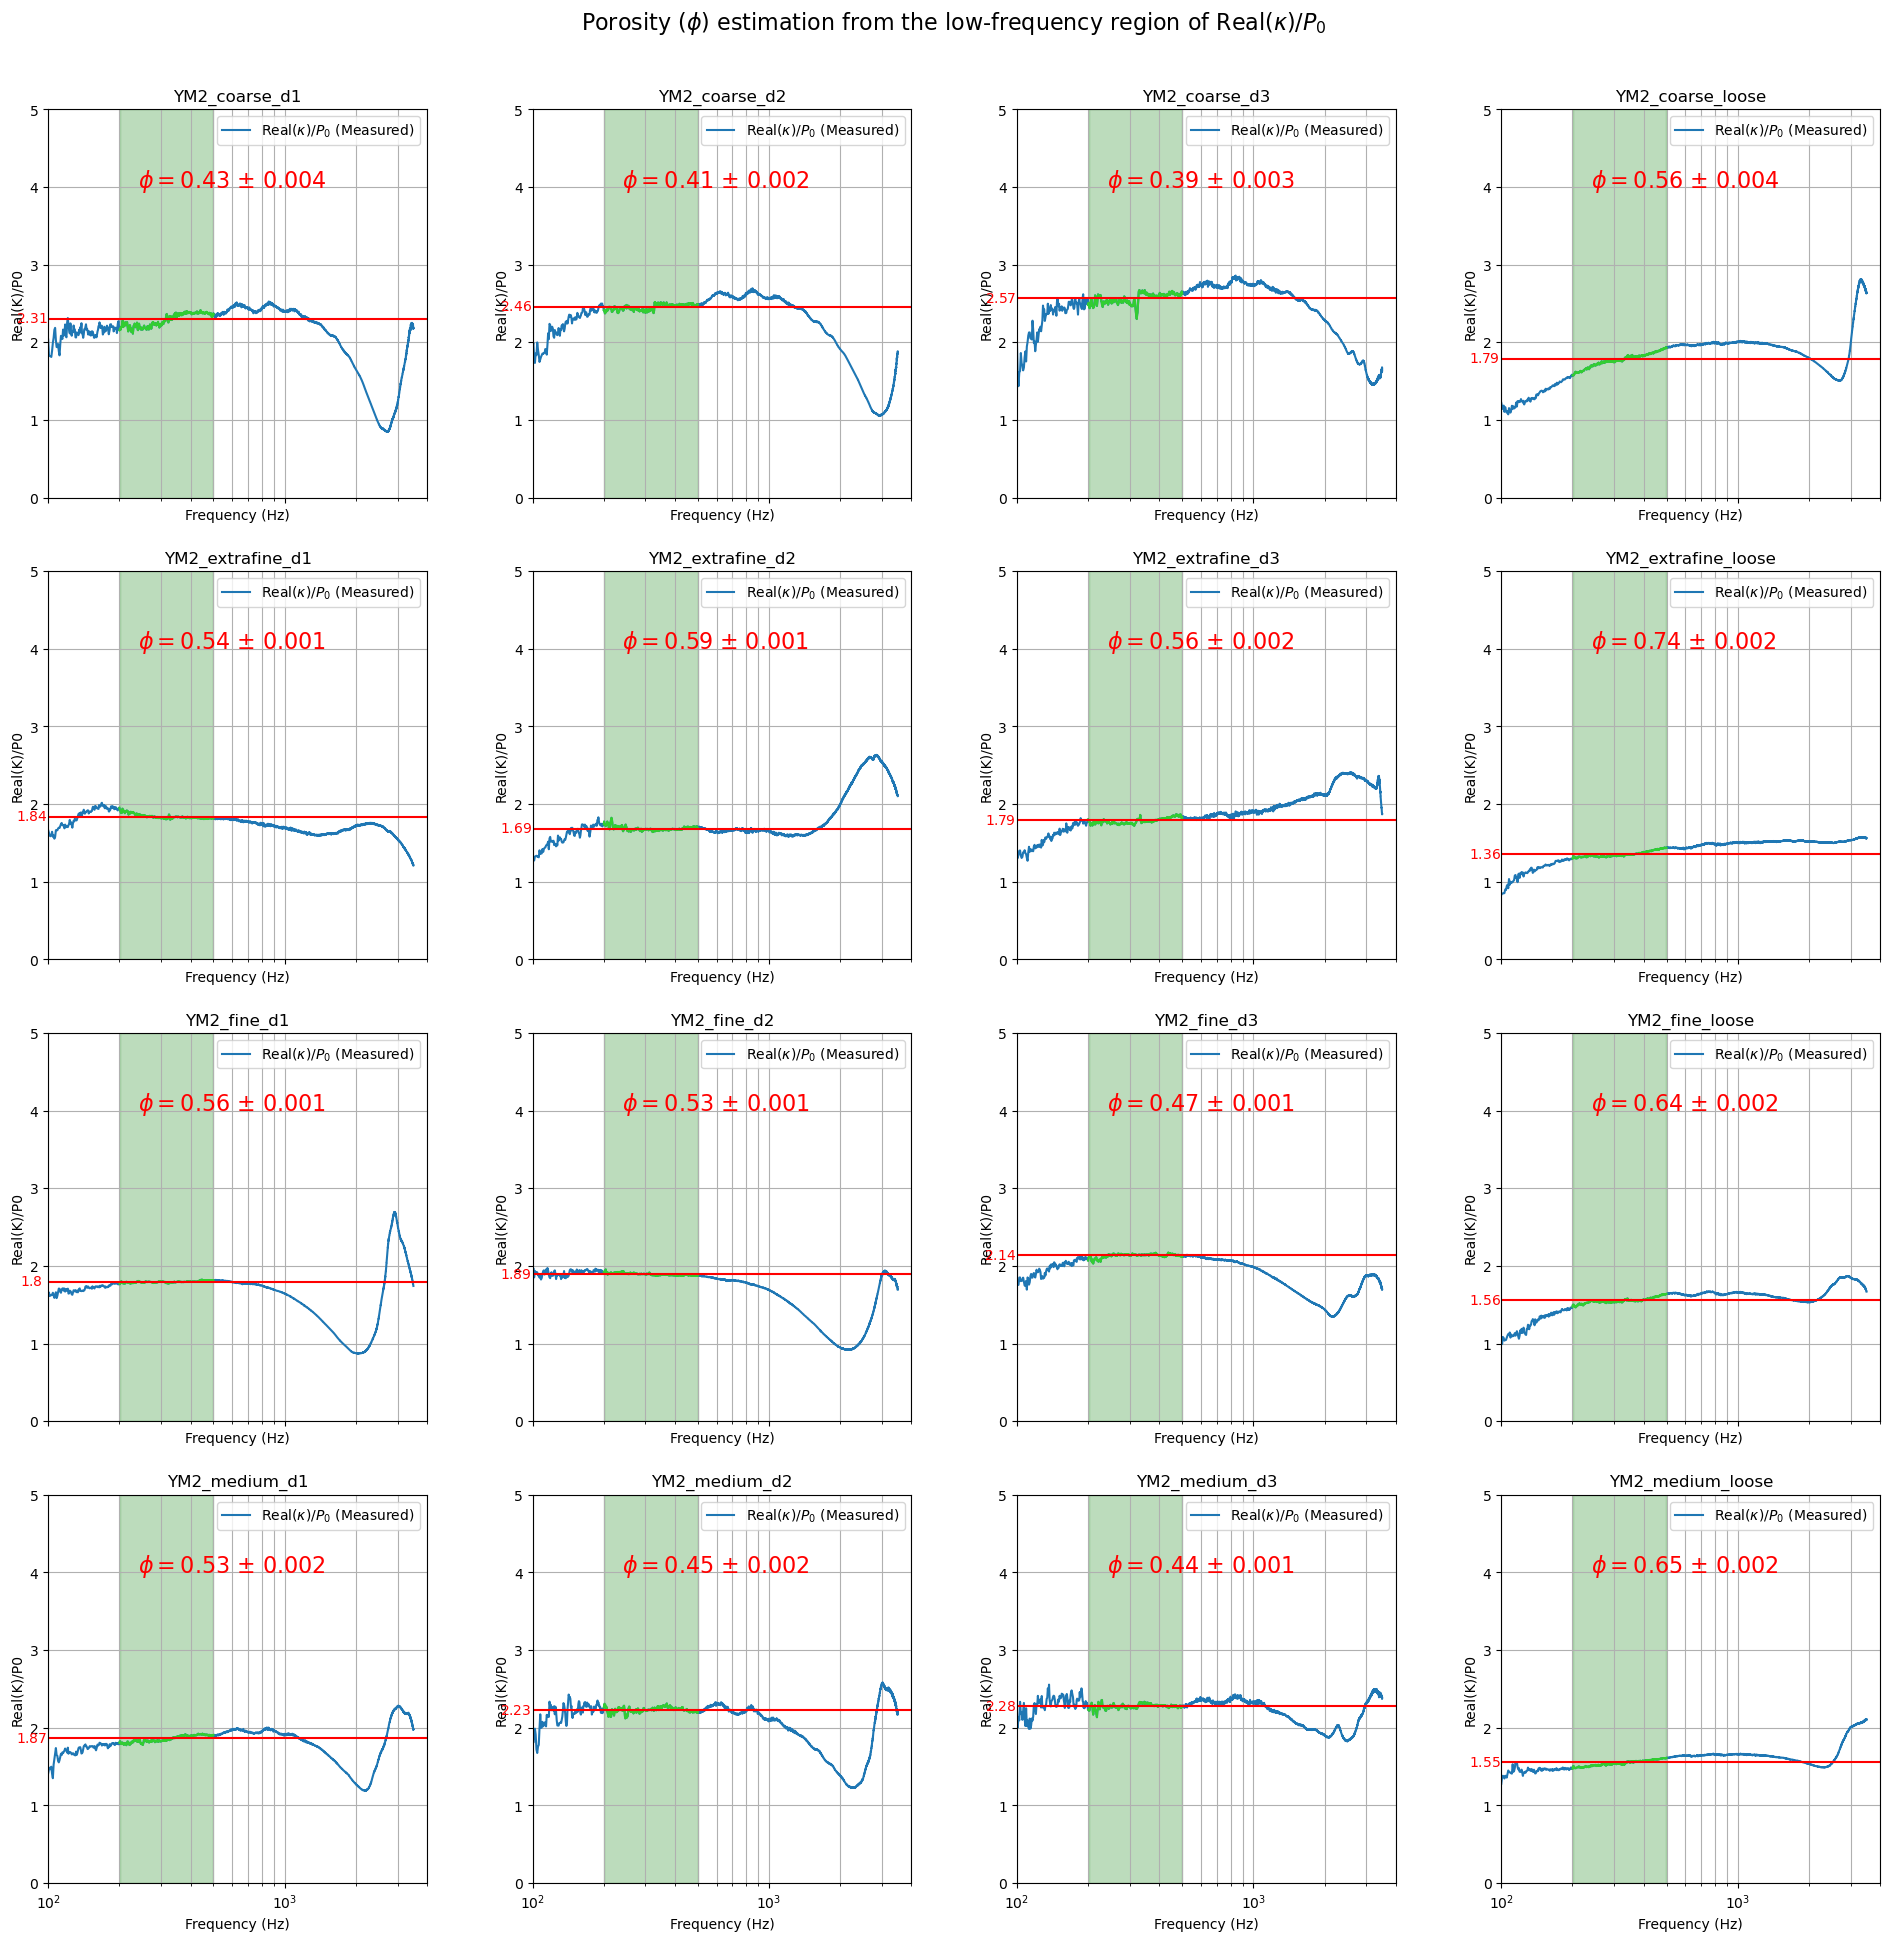

In [39]:

# For all the samples

fig, ax = plt.subplots(nrows, ncols, figsize=(rowsize,colsize), squeeze=False, sharex=True, sharey=False)
ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=4.5)

for i, axe in enumerate(ax):

    realK_avgdata = np.array(samples_abs_df.iloc[i]['real_K'])/p_atm     #Average real Kc
    imagK_avgdata = np.array(samples_abs_df.iloc[i]['imag_K'])/p_atm     #Average imag Kc
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    sample_name = samples_abs_df.index[i]

    # Frequency interval to analyse
    freq_start = 200 
    freq_end = 500

    index_start = np.where(freq==freq_start)[0][0]
    index_end = np.where(freq==freq_end)[0][0]

    interval_x = freq[(freq >= freq_start) & (freq <= freq_end)]
    interval_y = realK_avgdata[index_start:index_end+1]

    # Function to fit: a horizontal line (y = a) with a constant slope
    def horizontal_line(x, a):
        return a

    # Initial guess for the parameter 'a'
    p0 = np.mean(interval_y)

    # Fit the line to the interval data
    popt, pcov = curve_fit(horizontal_line, interval_x, interval_y, p0=p0)
    std_dev = np.sqrt(np.diag(pcov))

    porosity_estimated = round(1/round(popt[0],2),2)
    samples_abs_df.at[sample_name, 'porosity_estimated'] = porosity_estimated

    axe.semilogx(freq, realK_avgdata, label=r'Real($\kappa$)/$P_{0}$ (Measured)')
    axe.semilogx(interval_x, interval_y, c='limegreen')
    #ax.semilogx(freq, line_fit, '--',c='r')
    axe.axhline(popt, color='red', alpha=1)
    
    cond1 = freq>freq_start
    cond2=  freq<freq_end
    comb_cond = cond1 & cond2 
    axe.fill_between(freq, 0, 5, where= comb_cond, color='forestgreen', alpha=0.3)
    axe.text(85, round(popt[0],2), f'${round(popt[0],2)}$', ha="center", va="center", c='r')
    axe.text(freq_start*1.2, 4, f'$\phi =${round(1/round(popt[0],2),2)} $\pm$ {round(std_dev[0],3)}', ha="left", va="baseline", c='r', fontsize=16)
    
    axe.grid(which='both')
    axe.set_xlim(100, 4000)
    axe.set_ylim(0, 5)
    axe.set_xlabel('Frequency (Hz)')
    axe.set_ylabel('Real(K)/P0')
    axe.set_title(f'{sample_name}')
    axe.legend()
fig.subplots_adjust(top=0.93)
fig.suptitle(r'Porosity ($\phi$) estimation from the low-frequency region of Real($\kappa$)/$P_{0}$',fontsize=16)
plt.show()

<Axes: xlabel='density', ylabel='porosity_estimated'>

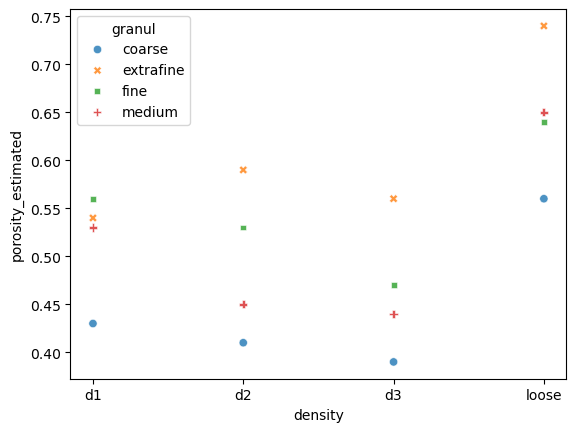

In [40]:
sns.scatterplot(data=samples_abs_df, x='density', y='porosity_estimated', hue='granul', style='granul', sizes=(20, 200), alpha=0.8)

### Static air-flow resistivity from the Imag($\rho_c$) --> Low-frequency limit

<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:35: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:35: SyntaxWarning: invalid escape sequence '\p'
C:\Users\joaqu\AppData\Local\Temp\ipykernel_43584\3995771523.py:35: SyntaxWarning: invalid escape sequence '\s'
  ax.text(freq_start*1.2,pos_y , f'$\sigma =${round(popt[0]*rho0)} $\pm$ {round(std_dev[0]*rho0,3)} $[Pa.s.m^{{-2}}]$', ha="left", va="baseline", c='r', fontsize=16)
C:\Users\joaqu\AppData\Local\Temp\ipykernel_43584\3995771523.py:35: SyntaxWarning: invalid escape sequence '\p'
  ax.text(freq_start*1.2,pos_y , f'$\sigma =${round(popt[0]*rho0)} $\pm$ {round(std_dev[0]*rho0,3)} $[Pa.s.m^{{-2}}]$', ha="left", va="baseline", c='r', fontsize=16)


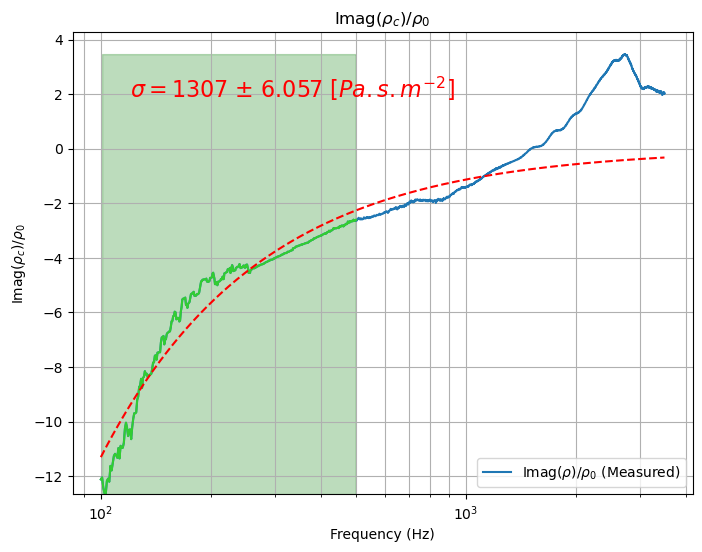

In [41]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

sample_selected = 'YM2_medium_d2'

realrho_avgdata = np.array(samples_abs_df.loc[sample_selected]['real_rho'])/rho0     #Average real Kc
imagrho_avgdata = np.array(samples_abs_df.loc[sample_selected]['imag_rho'])/rho0     #Average imag Kc

# Frequency interval to analyse
freq_start = 100 
freq_end = 500

index_start = np.where(freq==freq_start)[0][0]
index_end = np.where(freq==freq_end)[0][0]

interval_x = freq[(freq >= freq_start) & (freq <= freq_end)]
interval_y = imagrho_avgdata[index_start:index_end+1]

# Function to fit: 
def hyper_func(x, a):  #a=sigma/rho0
    return a/(-x)

# Fit the line to the interval data
popt, pcov = curve_fit(hyper_func, interval_x, interval_y)
std_dev = np.sqrt(np.diag(pcov))

ax.semilogx(freq, imagrho_avgdata, label=r'Imag($\rho$)/$\rho_{0}$ (Measured)')
ax.semilogx(interval_x, interval_y, c='limegreen')
ax.semilogx(freq, hyper_func(freq, *popt), '--',color='red', alpha=1)
cond1 = freq>freq_start
cond2=  freq<freq_end
comb_cond = cond1 & cond2 
ax.fill_between(freq, imagrho_avgdata.max(), imagrho_avgdata.min(), where=comb_cond, color='forestgreen', alpha=0.3)
pos_y=(imagrho_avgdata.max() - np.abs((imagrho_avgdata.max() - imagrho_avgdata.min()))*0.1)
ax.text(freq_start*1.2,pos_y , f'$\sigma =${round(popt[0]*rho0)} $\pm$ {round(std_dev[0]*rho0,3)} $[Pa.s.m^{{-2}}]$', ha="left", va="baseline", c='r', fontsize=16)

ax.grid(which='both')
#ax.set_xlim(100, 4000)
ax.set_ylim(imagrho_avgdata.min(), )
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel(r'Imag($\rho_{c}$)/$\rho_{0}$')
ax.set_title(r'Imag($\rho_{c}$)/$\rho_{0}$')
ax.legend()
plt.show()



<>:38: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\p'
<>:38: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\p'
C:\Users\joaqu\AppData\Local\Temp\ipykernel_43584\762020106.py:38: SyntaxWarning: invalid escape sequence '\s'
  axe.text(freq_start*1.2,pos_y , f'$\sigma =${round(popt[0]*rho0)} $\pm$ {round(std_dev[0]*rho0,3)} $[Pa.s.m^{{-2}}]$', ha="left", va="baseline", c='r', fontsize=16)
C:\Users\joaqu\AppData\Local\Temp\ipykernel_43584\762020106.py:38: SyntaxWarning: invalid escape sequence '\p'
  axe.text(freq_start*1.2,pos_y , f'$\sigma =${round(popt[0]*rho0)} $\pm$ {round(std_dev[0]*rho0,3)} $[Pa.s.m^{{-2}}]$', ha="left", va="baseline", c='r', fontsize=16)


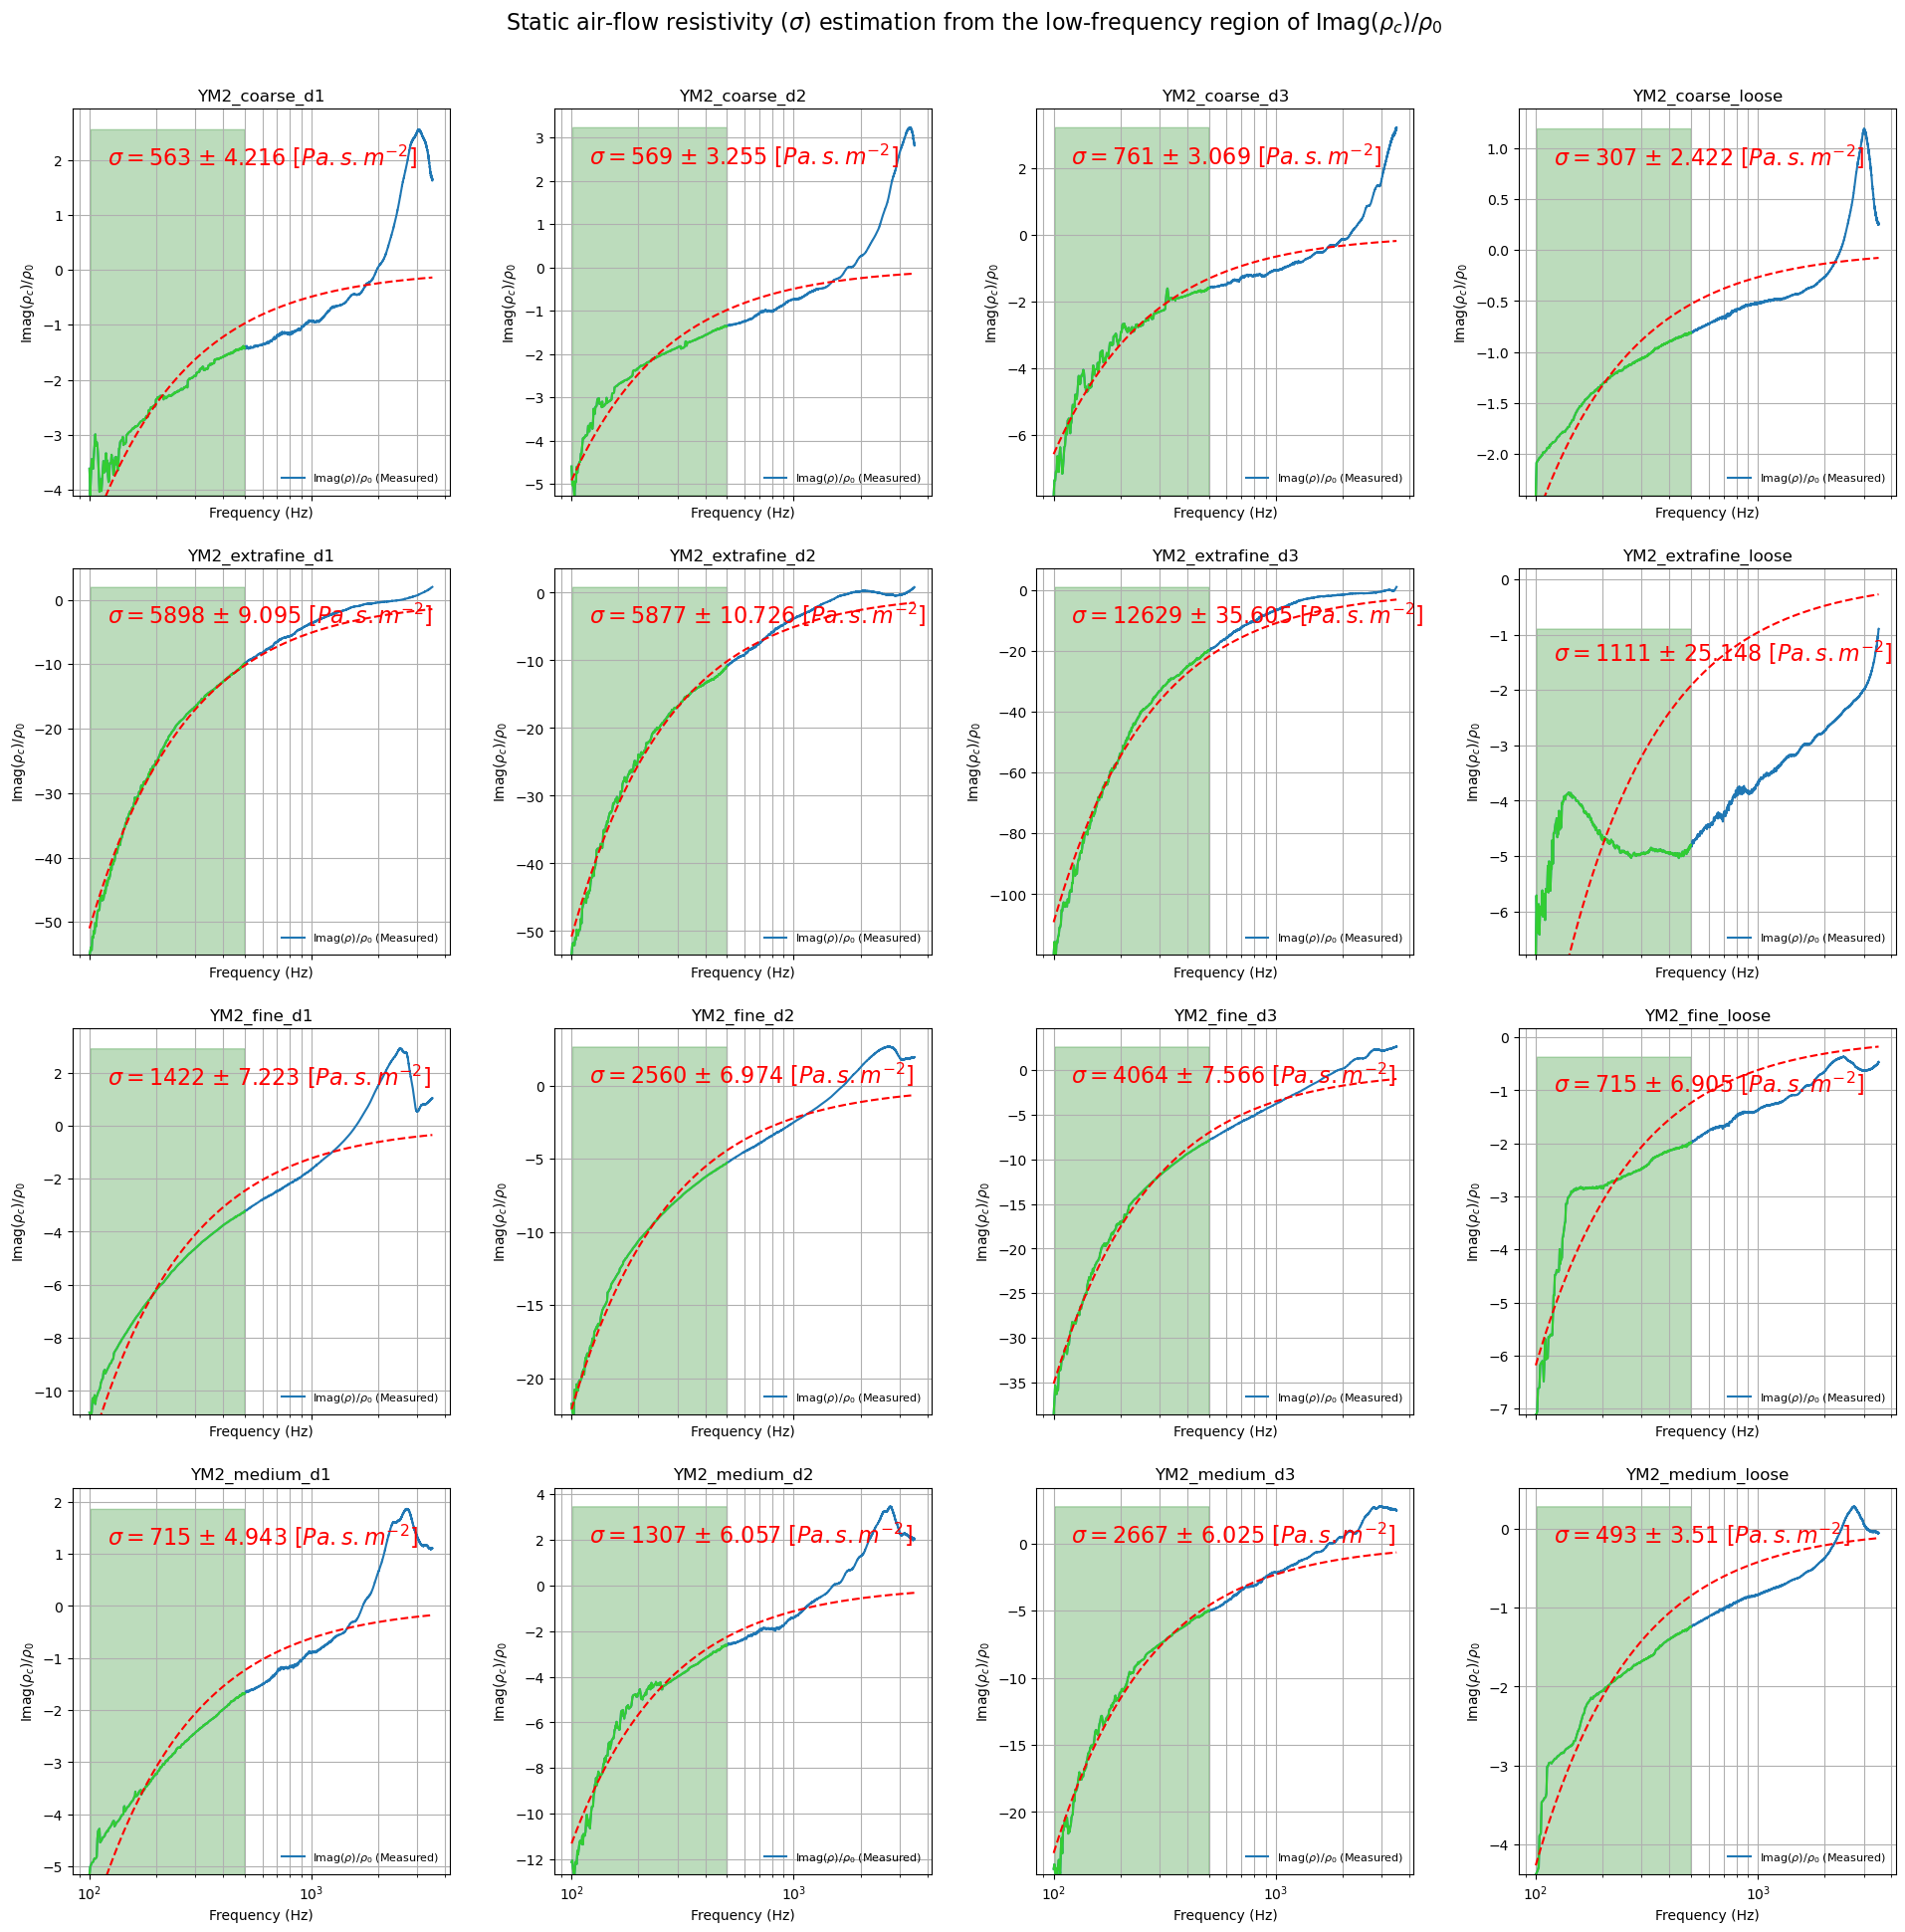

In [42]:
fig, ax = plt.subplots(nrows, ncols, figsize=(rowsize,colsize), squeeze=False, sharex=True, sharey=False)
ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=4.5)

for i, axe in enumerate(ax):

    realrho_avgdata = np.array(samples_abs_df.iloc[i]['real_rho'])/rho0     #Average real Kc
    imagrho_avgdata = np.array(samples_abs_df.iloc[i]['imag_rho'])/rho0     #Average imag Kc
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    sample_name = samples_abs_df.index[i]

    # Frequency interval to analyse
    freq_start = 100 
    freq_end = 500

    index_start = np.where(freq==freq_start)[0][0]
    index_end = np.where(freq==freq_end)[0][0]

    interval_x = freq[(freq >= freq_start) & (freq <= freq_end)]
    interval_y = imagrho_avgdata[index_start:index_end+1]

    # Function to fit: a horizontal line (y = a) with a constant slope
    def hyper_func(x, a):  #a=sigma/rho0
        return a/(-x)

    # Fit the line to the interval data
    popt, pcov = curve_fit(hyper_func, interval_x, interval_y)
    std_dev = np.sqrt(np.diag(pcov))

    axe.semilogx(freq, imagrho_avgdata, label=r'Imag($\rho$)/$\rho_{0}$ (Measured)')
    axe.semilogx(interval_x, interval_y, c='limegreen')
    axe.semilogx(freq, hyper_func(freq, *popt), '--',color='red', alpha=1)
    cond1 = freq>freq_start
    cond2=  freq<freq_end
    comb_cond = cond1 & cond2 
    axe.fill_between(freq, imagrho_avgdata.max(), imagrho_avgdata.min(), where=comb_cond, color='forestgreen', alpha=0.3)
    pos_y=(imagrho_avgdata.max() - np.abs((imagrho_avgdata.max() - imagrho_avgdata.min()))*0.1)
    axe.text(freq_start*1.2,pos_y , f'$\sigma =${round(popt[0]*rho0)} $\pm$ {round(std_dev[0]*rho0,3)} $[Pa.s.m^{{-2}}]$', ha="left", va="baseline", c='r', fontsize=16)

    axe.grid(which='both')
    #axe.set_xlim(100, 4000)
    axe.set_ylim(imagrho_avgdata.min(), )
    axe.set_xlabel('Frequency (Hz)')
    axe.set_ylabel(r'Imag($\rho_{c}$)/$\rho_{0}$')
    axe.set_title(f'{sample_name}')
    axe.legend(loc='lower right', fontsize=8, frameon=False)
    

fig.subplots_adjust(top=0.93)
fig.suptitle(r'Static air-flow resistivity ($\sigma$) estimation from the low-frequency region of Imag($\rho_{c}$)/$\rho_{0}$',fontsize=16)
plt.show()

<>:48: SyntaxWarning: invalid escape sequence '\s'
<>:48: SyntaxWarning: invalid escape sequence '\p'
<>:48: SyntaxWarning: invalid escape sequence '\s'
<>:48: SyntaxWarning: invalid escape sequence '\p'
C:\Users\joaqu\AppData\Local\Temp\ipykernel_43584\164456386.py:48: SyntaxWarning: invalid escape sequence '\s'
  axe.text(freq_start*1.2,pos_y , f'$\sigma =${round(popt[0]*rho0)} $\pm$ {round(std_dev[0]*rho0,3)} $[Pa.s.m^{{-2}}]$', ha="left", va="baseline", c='r', fontsize=16)
C:\Users\joaqu\AppData\Local\Temp\ipykernel_43584\164456386.py:48: SyntaxWarning: invalid escape sequence '\p'
  axe.text(freq_start*1.2,pos_y , f'$\sigma =${round(popt[0]*rho0)} $\pm$ {round(std_dev[0]*rho0,3)} $[Pa.s.m^{{-2}}]$', ha="left", va="baseline", c='r', fontsize=16)


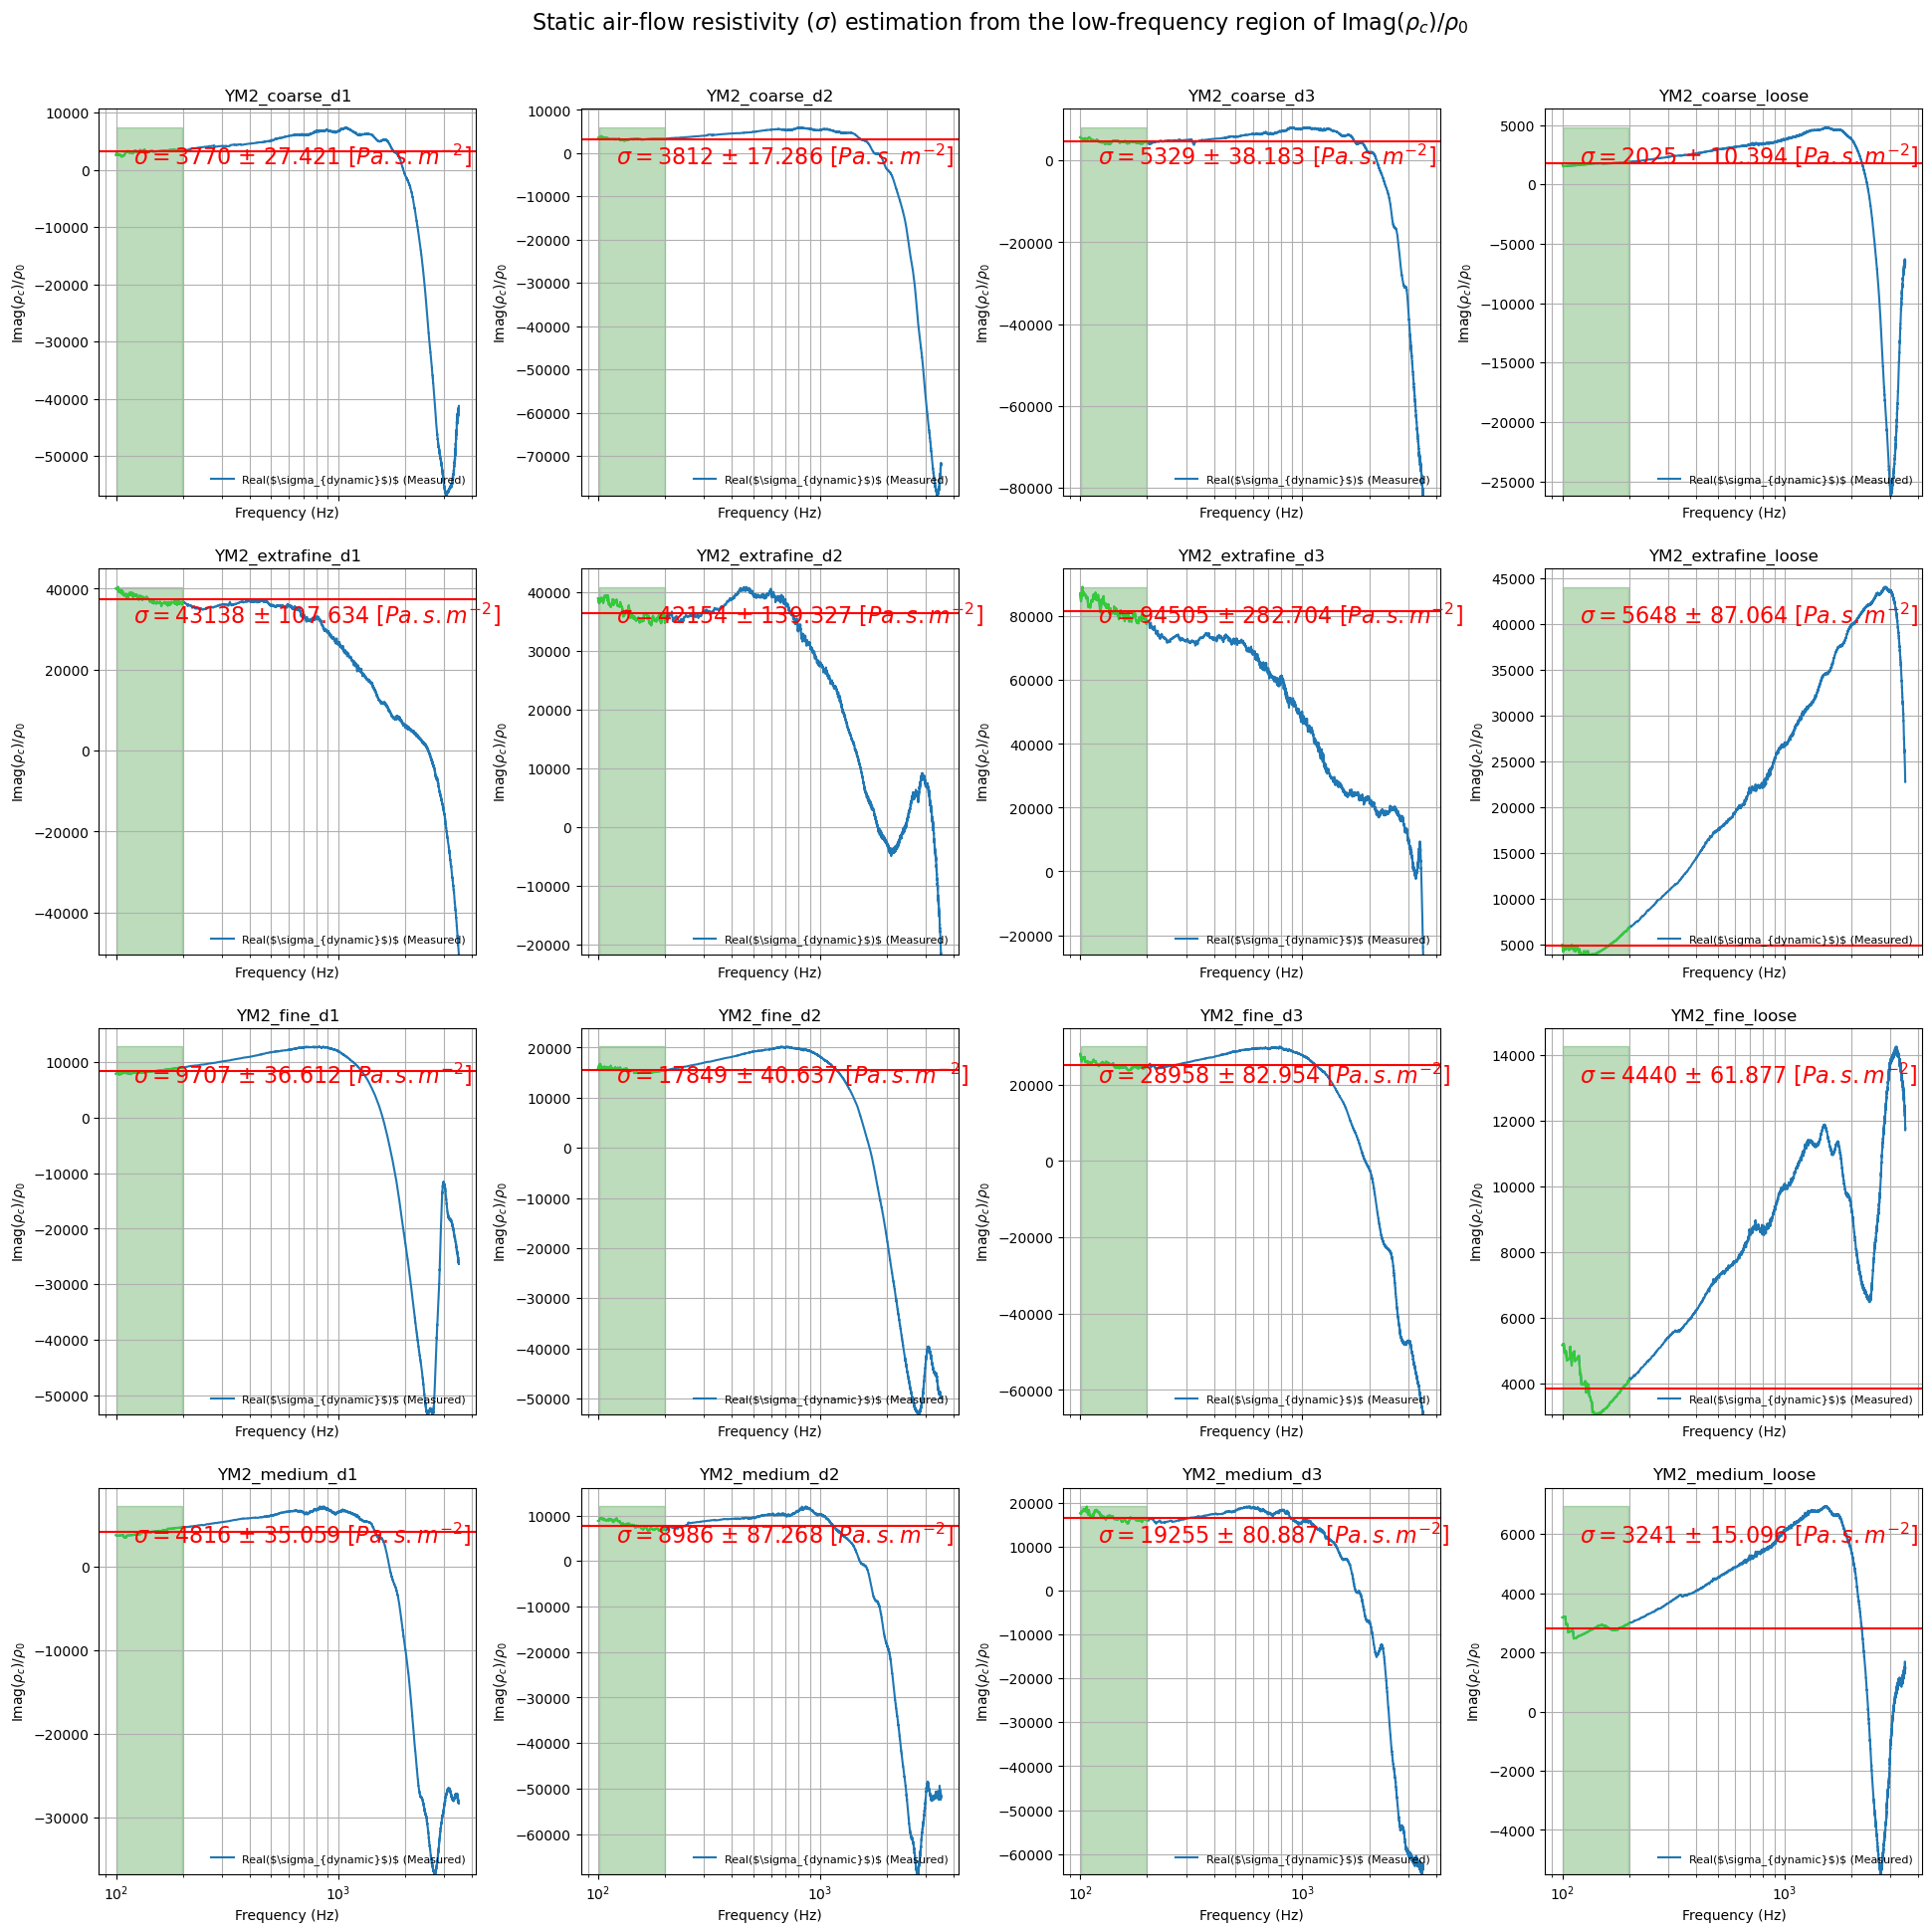

In [43]:
# FLOW RESISTIVITY ESTIMATION from low freq region Re(dynamic resistivity) (Panneton et al.)


fig, ax = plt.subplots(nrows, ncols, figsize=(rowsize,colsize), squeeze=False, sharex=True, sharey=False)
ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=4.5)

for i, axe in enumerate(ax):

    realrho_avgdata = np.array(samples_abs_df.iloc[i]['real_rho'])#/rho0     #Average real Kc
    imagrho_avgdata = np.array(samples_abs_df.iloc[i]['imag_rho'])#/rho0     #Average imag Kc
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    sample_name = samples_abs_df.index[i]

    rho_c = realrho_avgdata + 1j*imagrho_avgdata
    dinamic_resistivity =  1j * (2*np.pi*freq)*(rho_c)  # Dynamic resistivity
    re_din_res = np.real(dinamic_resistivity)  # Real part of dynamic resistivity

    # Frequency interval to analyse
    freq_start = 100 
    freq_end = 200

    index_start = np.where(freq==freq_start)[0][0]
    index_end = np.where(freq==freq_end)[0][0]

    interval_x = freq[(freq >= freq_start) & (freq <= freq_end)]
    interval_y = re_din_res[index_start:index_end+1]

    # Function to fit: a horizontal line (y = a) with a constant slope
    def hyper_func(x, a):  #a=sigma/rho0
        return a

    # Fit the line to the interval data
    popt, pcov = curve_fit(hyper_func, interval_x, interval_y)
    std_dev = np.sqrt(np.diag(pcov))

    sigma_estimated = round(popt[0] * rho0)  # Estimated flow resistivity
    samples_abs_df.at[sample_name, 'sigma_estimated'] = sigma_estimated

    axe.semilogx(freq, re_din_res, label=r'Real($\sigma_{dynamic}$)$ (Measured)')
    axe.semilogx(interval_x, interval_y, c='limegreen')
    axe.axhline(popt, color='red', alpha=1)
    cond1 = freq>freq_start
    cond2=  freq<freq_end
    comb_cond = cond1 & cond2 
    axe.fill_between(freq, re_din_res.max(), re_din_res.min(), where=comb_cond, color='forestgreen', alpha=0.3)
    pos_y=(re_din_res.max() - np.abs((re_din_res.max() - re_din_res.min()))*0.1)
    axe.text(freq_start*1.2,pos_y , f'$\sigma =${round(popt[0]*rho0)} $\pm$ {round(std_dev[0]*rho0,3)} $[Pa.s.m^{{-2}}]$', ha="left", va="baseline", c='r', fontsize=16)

    axe.grid(which='both')
    #axe.set_xlim(100, 4000)
    axe.set_ylim(re_din_res.min(), )
    axe.set_xlabel('Frequency (Hz)')
    axe.set_ylabel(r'Imag($\rho_{c}$)/$\rho_{0}$')
    axe.set_title(f'{sample_name}')
    axe.legend(loc='lower right', fontsize=8, frameon=False)
    

fig.subplots_adjust(top=0.93)
fig.suptitle(r'Static air-flow resistivity ($\sigma$) estimation from the low-frequency region of Imag($\rho_{c}$)/$\rho_{0}$',fontsize=16)
plt.show()

<Axes: xlabel='density', ylabel='sigma_measured'>

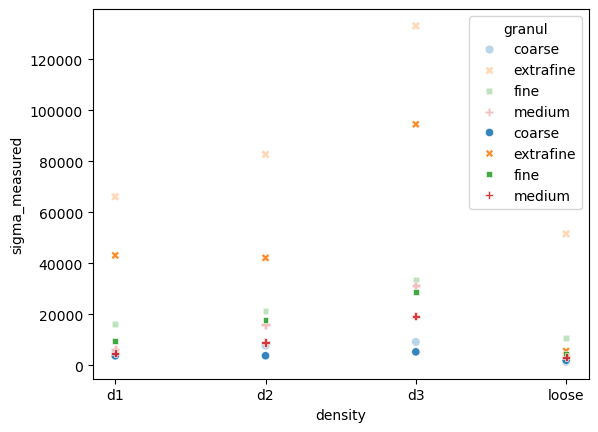

In [44]:
# RESISTIVITY VALUES MEASURED

sns.scatterplot(data=samples_abs_df, x='density', y='sigma_measured', hue='granul',  style='granul', sizes=(20, 200), alpha=0.3)
sns.scatterplot(data=samples_abs_df, x='density', y='sigma_estimated', hue='granul',  style='granul', sizes=(40, 400), alpha=0.9)


### Tortuosity estimated from the high-frequency region of the Real($\rho_{c}$)

$\alpha_{inf} = {\phi} * \Re(\rho_{c}/{\rho_{0}})$  when: ($\omega \rightarrow \infty$)   $\textit{(Inversion problems for.. Pompoli et al.)}$

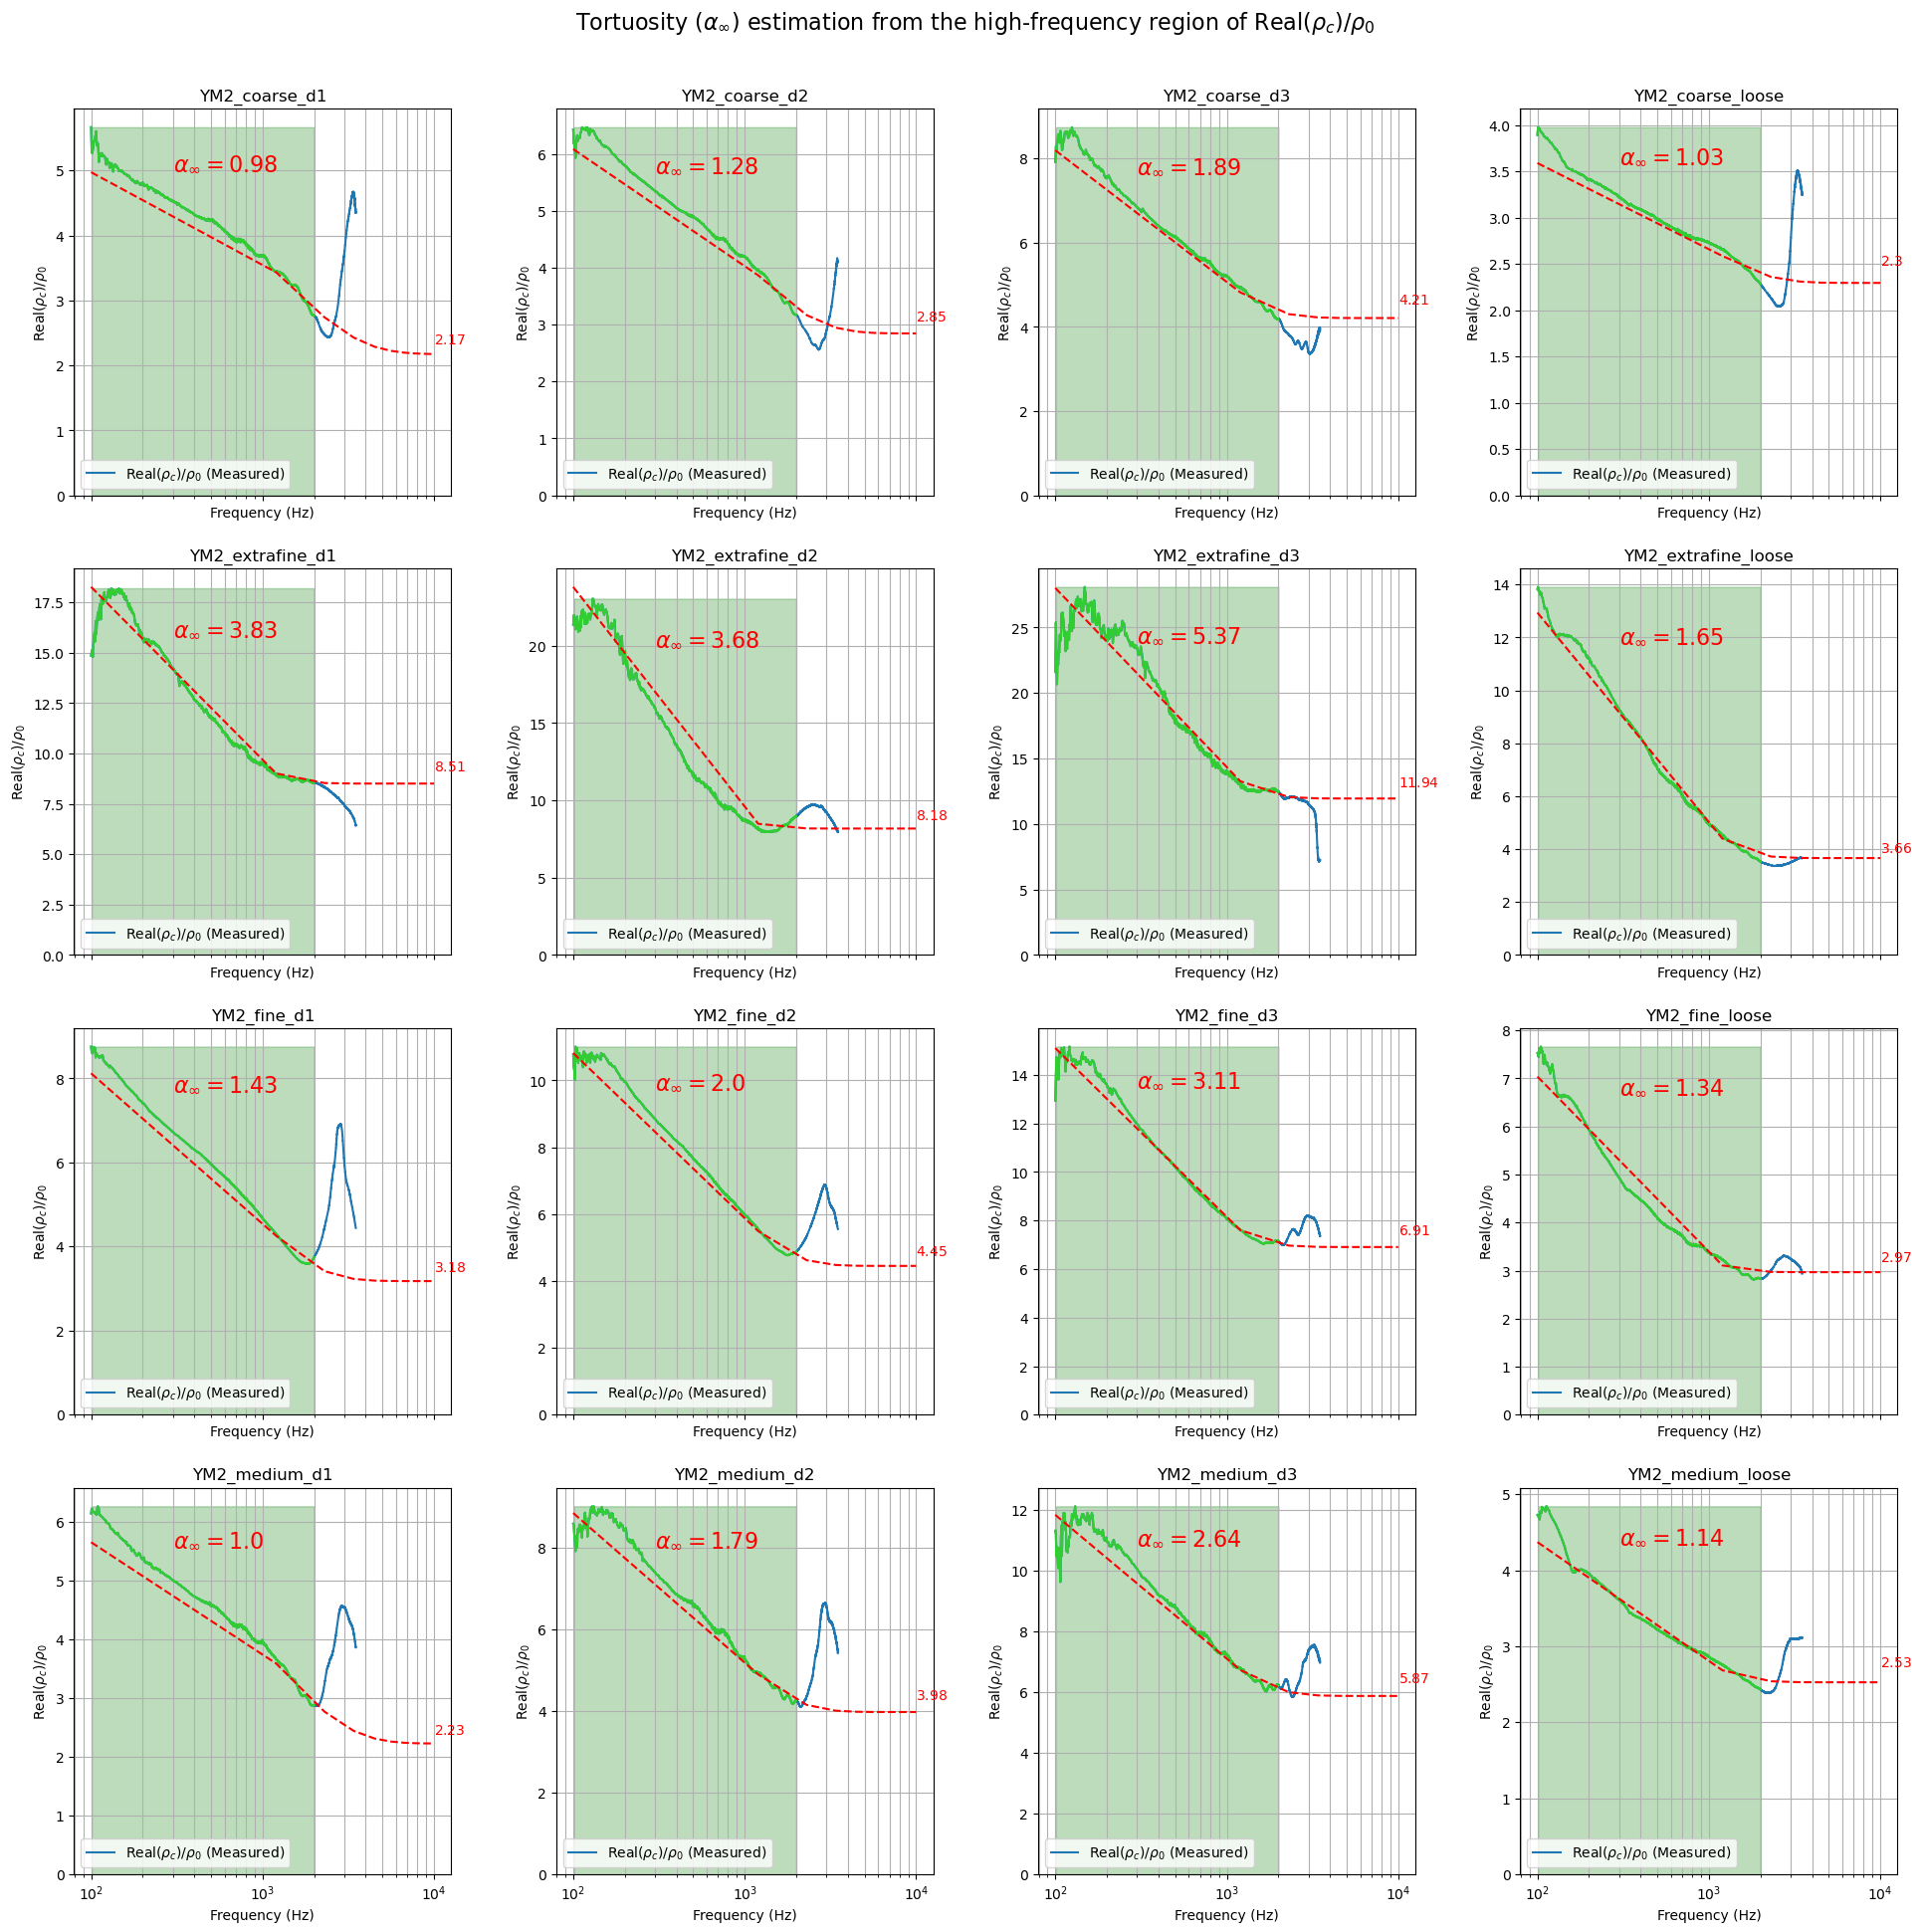

In [45]:
fig, ax = plt.subplots(nrows, ncols, figsize=(rowsize,colsize), squeeze=False, sharex=True, sharey=False)
ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=4.5)

for i, axe in enumerate(ax):

    realrho_avgdata = np.array(samples_abs_df.iloc[i]['real_rho'])/rho0     #Average real Kc
    #imagrho_avgdata = np.array(samples_abs_df.iloc[i]['imag_rho'])/rho0     #Average imag Kc
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    sample_name = samples_abs_df.index[i]

    # Frequency interval to analyse
    freq_start = 100 
    freq_end = 2000

    index_start = np.where(freq==freq_start)[0][0]
    index_end = np.where(freq==freq_end)[0][0]

    interval_x = freq[(freq >= freq_start) & (freq <= freq_end)]
    interval_y = realrho_avgdata[index_start:index_end+1]

    # Function to fit
    def exp_func(x, a, b, c): 
        return a * np.exp(-b * x) + c
        #return a*x**2 + b*x + c
        

    # Fit in the interval data
    popt, pcov = curve_fit(exp_func, interval_x, interval_y, p0=[50.5, 0.002, 12])
    std_dev = np.sqrt(np.diag(pcov))

    freq2 = np.linspace(100, 10000, 10)
    
    axe.semilogx(freq, realrho_avgdata, label=r'Real($\rho_{c}$)/$\rho_{0}$ (Measured)')
    axe.semilogx(interval_x, interval_y, c='limegreen')
    axe.semilogx(freq2, exp_func(freq2, *popt), '--',color='red', alpha=1)
    cond1 = freq>freq_start
    cond2=  freq<freq_end
    comb_cond = cond1 & cond2 
    axe.fill_between(freq, realrho_avgdata.max(), 0, where=comb_cond, color='forestgreen', alpha=0.3)
    pos_y=(realrho_avgdata.max() - np.abs((realrho_avgdata.max() - realrho_avgdata.min()))*0.2)
    
    value=round(exp_func(freq2[-1], *popt),2)
    axe.text(freq_start*3, pos_y, r'$\alpha_{\infty} = $'f'{round(value*0.45, 2)}', ha="left", va="baseline", c='r', fontsize=16)
    axe.text(freq2[-1], value*1.1, f'${value}$', ha="left", va="center", c='r')

    axe.grid(which='both')
    axe.set_ylim(0,None)
    #axe.set_xscale('linear')
    #axe.set_ylim(realrho_avgdata.min(), )
    axe.set_xlabel('Frequency (Hz)')
    axe.set_ylabel(r'Real($\rho_{c}$)/$\rho_{0}$')
    axe.set_title(f'{sample_name}')
    axe.legend()
fig.subplots_adjust(top=0.93)
fig.suptitle(r'Tortuosity ($\alpha_{\infty}$) estimation from the high-frequency region of Real($\rho_{c}$)/$\rho_{0}$',fontsize=16)
plt.show()

<>:48: SyntaxWarning: invalid escape sequence '\S'
<>:48: SyntaxWarning: invalid escape sequence '\S'
C:\Users\joaqu\AppData\Local\Temp\ipykernel_43584\3621955698.py:48: SyntaxWarning: invalid escape sequence '\S'
  axe.plot(omega_prima, line_fit, '--',color='red', alpha=1, label='Fitted ($\Sigma$)')
C:\Users\joaqu\AppData\Local\Temp\ipykernel_43584\3621955698.py:38: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(line, interval_x, interval_y)
C:\Users\joaqu\AppData\Local\Temp\ipykernel_43584\3621955698.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  samples_abs_df.at[sample_name, 'tortuosity_estimated'] = alpha_inf2
C:\Users\joaqu\AppData\Local\Temp\ipykernel_43584\3621955698.py:38: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pc

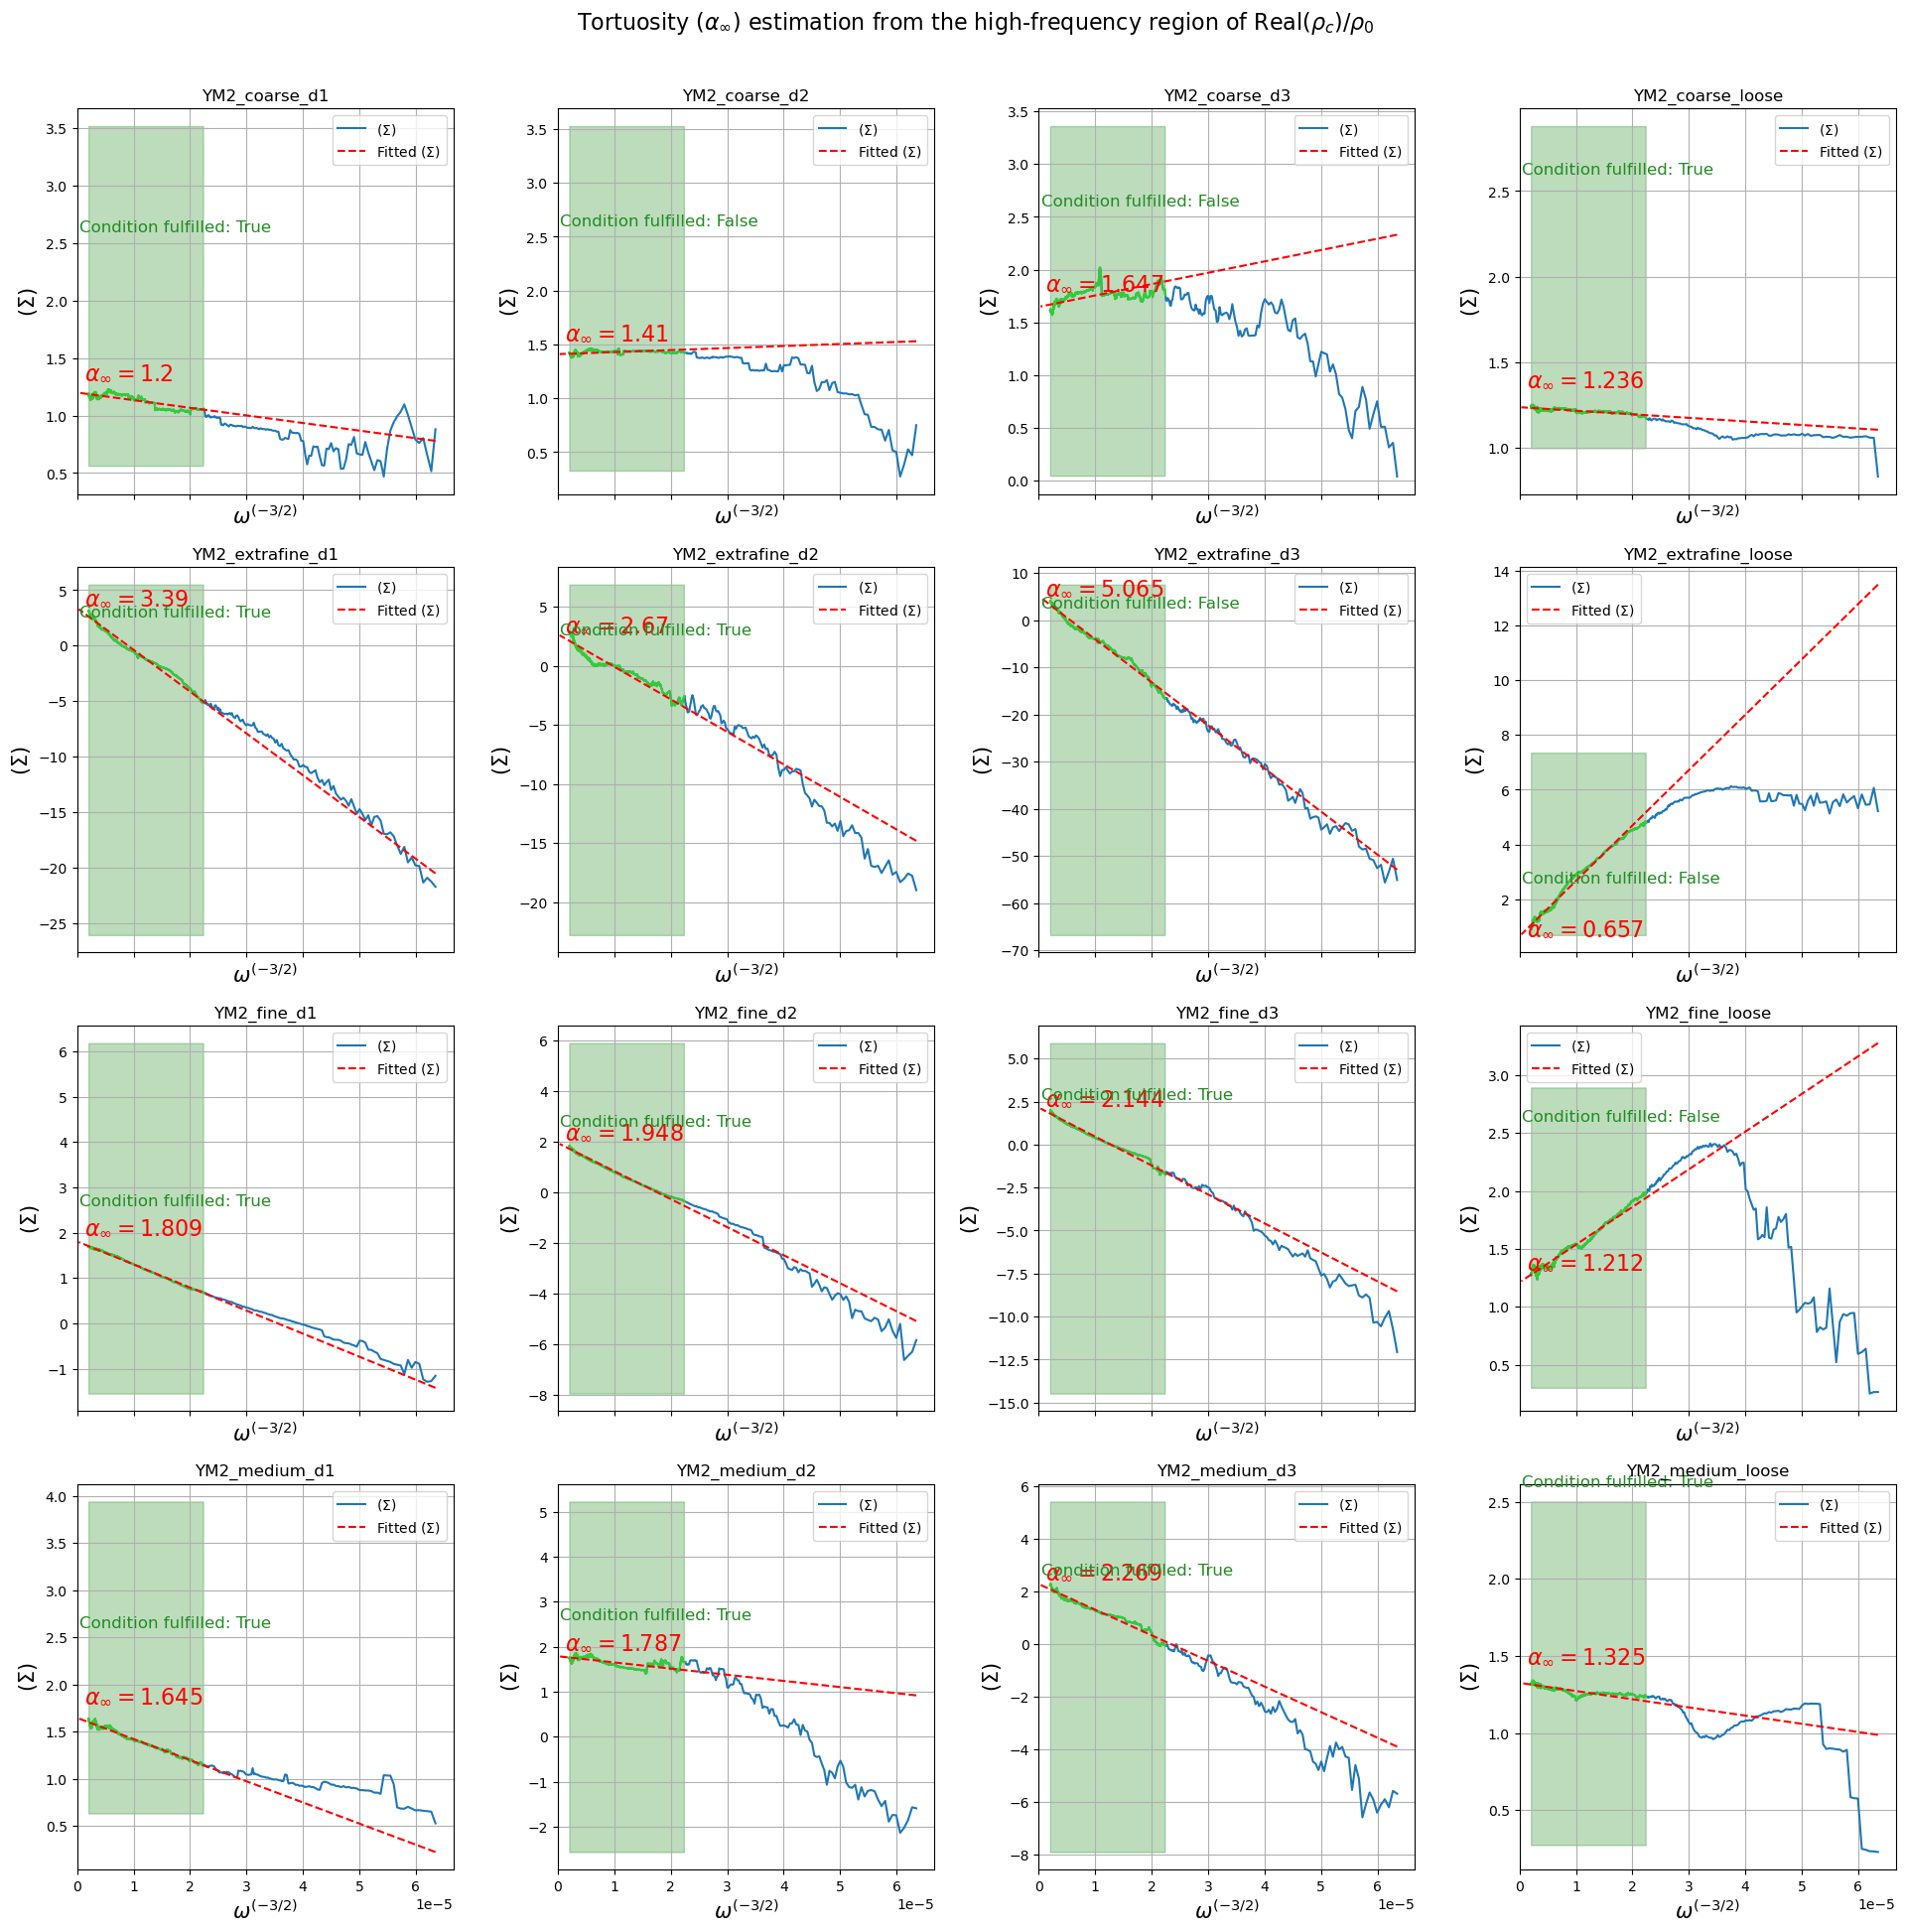

In [46]:
# TORTUOSITY FROM SYGMA FUNCTION


fig, ax = plt.subplots(nrows, ncols, figsize=(rowsize,colsize), squeeze=False, sharex=True, sharey=False)
ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=4.5)

for i, axe in enumerate(ax):

    realrho_avgdata = np.array(samples_abs_df.iloc[i]['real_rho'])#/rho0     #Average real Kc
    imagrho_avgdata = np.array(samples_abs_df.iloc[i]['imag_rho'])#/rho0     #Average imag Kc
    porosity = np.array(samples_abs_df.iloc[i]['porosity_estimated'])
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    sample_name = samples_abs_df.index[i]

    rho_ = realrho_avgdata + 1j*imagrho_avgdata
    omega = 2*np.pi*freq
    omega_prima = (omega**(-3/2))

    suma = (porosity/rho0) * (np.real(rho_) + np.imag(rho_))  # extrapolation
    
    # Frequency interval to analyse
    freq_start = (2*np.pi*200)**(-3/2)
    freq_end = (2*np.pi*1000)**(-3/2)

    index_start = np.where(omega_prima==freq_start)[0][0]
    index_end = np.where(omega_prima==freq_end)[0][0]

    interval_x = omega_prima[(omega_prima <= freq_start) & (omega_prima >= freq_end)]
    interval_y = suma[index_start:index_end+1]

    # Function to fit
    def line(x, a, b, c): 
        return -a * (x) - b 
        

    # Fit in the interval data
    popt, pcov = curve_fit(line, interval_x, interval_y)
    std_dev = np.sqrt(np.diag(pcov))
    line_fit = line(omega_prima, *popt)

    freq2 = np.linspace(100, 10000, 10)
    
    idx_cut = (omega_prima>(2*np.pi*900)**(-3/2))
    axe.plot(omega_prima[idx_cut], suma[idx_cut], label=r'($\Sigma$)')
    #axe.plot(omega_prima, suma, label=r'($\Sigma$)')
    axe.plot(interval_x, interval_y, c='limegreen')
    axe.plot(omega_prima, line_fit, '--',color='red', alpha=1, label='Fitted ($\Sigma$)')
    cond1 = omega_prima<freq_start
    cond2=  omega_prima>freq_end
    comb_cond = cond1 & cond2 
    axe.fill_between(omega_prima, suma.max()*1.2, suma.min()*1.2, where=comb_cond, color='forestgreen', alpha=0.3)
    pos_y=(suma.max() - np.abs((suma.max() - suma.min()))*0.2)

    alpha_inf2 = round(np.abs(popt[1]), 3)
    axe.text(freq_end*0.6, alpha_inf2*1.1, r'$\alpha_{\infty} = $' f'{alpha_inf2}', ha="left", va="baseline", c='r', fontsize=16)

    interval_x_omega = (interval_x**(-2/3))
    interval_x_freq = (interval_x**(-2/3))/(2*np.pi)
    validity_condition = popt[0]**(2/3)
    #print(f'Validity condition: omega > m^(2/3)={validity_condition}')
    #print(f'omega min: {min(interval_x_omega)} , omega max: {max(interval_x_omega)}')
    #print(f'freq min: {min(interval_x_freq)} , freq max: {max(interval_x_freq)}')
    passed = (interval_x_omega > validity_condition).any()
    #print(f'Condition fulfilled: {passed}')
    #print(f'Tortuosity = {alpha_inf2}')
    
    samples_abs_df.at[sample_name, 'tortuosity_estimated'] = alpha_inf2

    axe.text(freq_end*0.2, 2.6, f'Condition fulfilled: {passed}', ha="left", va="baseline", c='forestgreen', fontsize=12)

    axe.grid(which='both')
    axe.set_xlim(0, )
    #axe.set_ylim(suma.min(), suma.max())
    #axe.set_ylim(0, 2)
    axe.set_xlabel(r'$\omega^{(-3/2)}$', fontsize=15)
    axe.set_ylabel(r'($\Sigma$)', fontsize=15)
    axe.set_title(f'{sample_name}')
    # ax.set_title(r'Function ($\Sigma$)')
    axe.legend()

fig.subplots_adjust(top=0.93)
fig.suptitle(r'Tortuosity ($\alpha_{\infty}$) estimation from the high-frequency region of Real($\rho_{c}$)/$\rho_{0}$',fontsize=16)
plt.show()

In [47]:
custom_order = ['d0', 'd1', 'd2', 'd3']
samples_abs_df.loc[samples_abs_df['density'] == 'loose', 'density'] = 'd0'
samples_abs_df['density'] = pd.Categorical(samples_abs_df['density'], categories=custom_order, ordered=True)



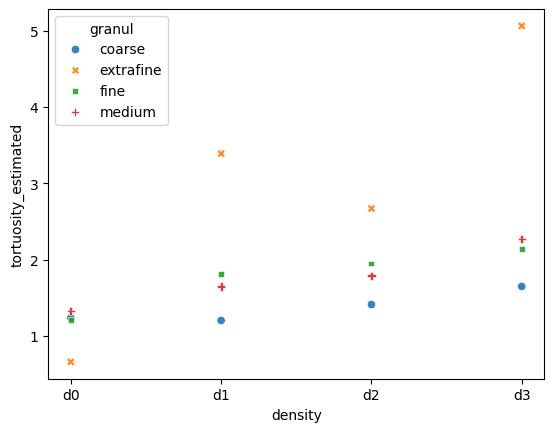

<Axes: xlabel='density', ylabel='tortuosity_estimated'>

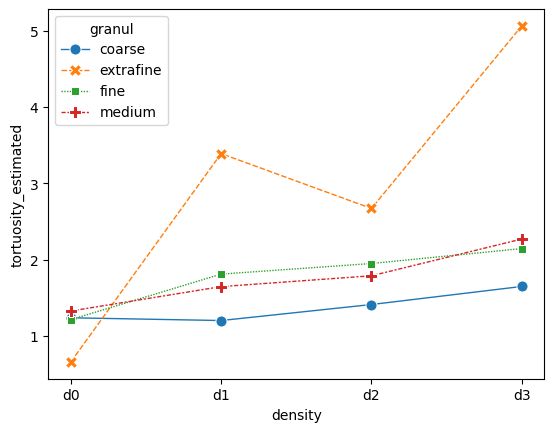

In [48]:
# TORTUOSITY

custom_order = ['loose', 'd1', 'd2', 'd3']
sns.scatterplot(data=samples_abs_df, x='density', y='tortuosity_estimated', sizes=(40, 400), hue='granul', style='granul', alpha=0.9)
plt.show()

sns.lineplot(
    data=samples_abs_df,
    x='density',
    y='tortuosity_estimated',
    hue='granul',
    style='granul',
    markers=True,
    linewidth=1,
    markersize=8,
)

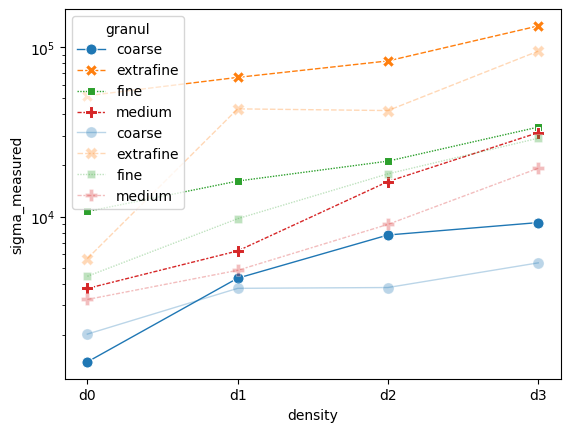

In [49]:
# RESISTIVITY VALUES MEASURED

import seaborn as sns

#sns.scatterplot(data=samples_abs_df, x='density', y='sigma_measured', hue='granul',  style='granul', sizes=(20, 200), alpha=0.3)
#sns.scatterplot(data=samples_abs_df, x='density', y='sigma_estimated', hue='granul',  style='granul', sizes=(40, 400), alpha=0.9)

sns.lineplot(
    data=samples_abs_df,
    x='density',
    y='sigma_measured',
    hue='granul',
    style='granul',
    markers=True,
    linewidth=1,
    markersize=8,
)

sns.lineplot(
    data=samples_abs_df,
    x='density',
    y='sigma_estimated',
    hue='granul',
    style='granul',
    markers=True,
    linewidth=1,
    markersize=8,
    alpha=0.3
)

plt.yscale('log')

<Axes: xlabel='density', ylabel='porosity_estimated'>

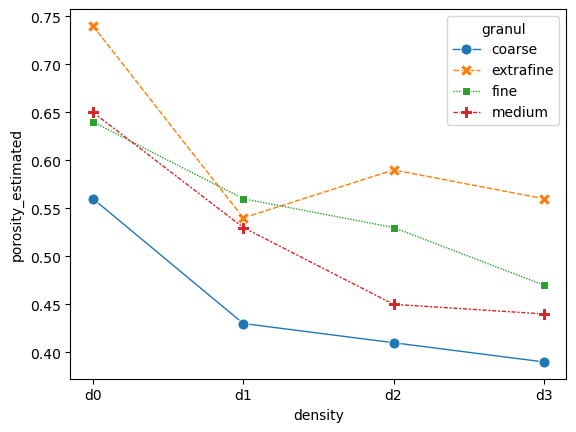

In [50]:
# POROSITY ESTIMATION

#sns.scatterplot(data=samples_abs_df, x='density', y='porosity_estimated', hue='granul', style='granul', sizes=(20, 200), alpha=0.8)
sns.lineplot(
    data=samples_abs_df,
    x='density',
    y='porosity_estimated',
    hue='granul',
    style='granul',
    markers=True,
    linewidth=1,
    markersize=8,
)


<Axes: xlabel='dens_value', ylabel='sigma_estimated'>

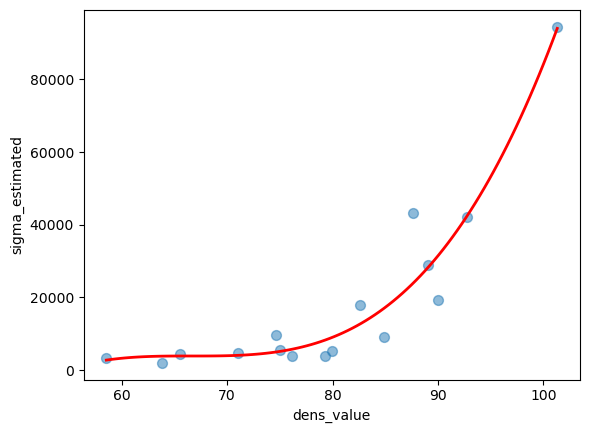

In [71]:
sns.regplot(data=samples_abs_df, x='dens_value', y='sigma_estimated', order=3, ci=None , scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red', 'linewidth': 2})

In [72]:
# Save the dataframe as .csv

samples_abs_df.to_csv('YM2_dataset_full.csv', index=True)

### Characteristic lengths $\Lambda$ and $\Lambda^{'}$